In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sb 
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_columns',None)
df=pd.read_csv('train.csv')# here we see the training columns with target variable 
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1         Lvl    AllPub    Inside       Mod        NAmes       Norm   
2         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4         Lvl    AllPub       FR2       Gtl       NWAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm   TwnhsE     1Story            6            5       1976   
1       Norm     1Fam     1Story            8            6       1970   
2       Norm     1Fam     2Story            7            5       1996   
3       Norm     1Fam     1Story            6            6       1977   
4       Norm     1Fam     1Story            6            7       1977   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1976     Gable  CompShg     Plywood     Plywood       None   
1          1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2          1997     Gable  CompShg     MetalSd     MetalSd       None   
3          1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4          2000     Gable  CompShg     CemntBd     CmentBd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       Gd       TA           No   
1         0.0        Gd        Gd      PConc       TA       Gd           Gd   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3       480.0        TA        TA     CBlock       Gd       TA           No   
4       126.0        Gd        TA     CBlock       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          ALQ         120          Unf           0        958         1078   
1          ALQ         351          Rec         823       1043         2217   
2          GLQ         862          Unf           0        255         1117   
3          BLQ         705          Unf           0       1139         1844   
4          ALQ        1246          Unf           0        356         1602   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       958         0             0   
1    GasA        Ex          Y      SBrkr      2217         0             0   
2    GasA        Ex          Y      SBrkr      1127       886             0   
3    GasA        Ex          Y      SBrkr      1844         0             0   
4    GasA        Gd          Y      SBrkr      1602         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        958             0             0         2         0             2   
1       2217             1             0         2         0             4   
2       2013             1             0         2         1             3   
3       1844             0             0         2         0             3   
4       1602             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           1          TA   
1             1          Gd             8        Typ           1          TA   
2             1          TA             8        Typ           1          TA   
3             1          TA       

In [4]:
df1=pd.read_csv('test.csv')# here we see test columns without target columns 
df1

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     337          20       RL         86.0    14157   Pave   NaN      IR1   
1    1018         120       RL          NaN     5814   Pave   NaN      IR1   
2     929          20       RL          NaN    11838   Pave   NaN      Reg   
3    1148          70       RL         75.0    12000   Pave   NaN      Reg   
4    1227          60       RL         86.0    14598   Pave   NaN      IR1   
..    ...         ...      ...          ...      ...    ...   ...      ...   
287    83          20       RL         78.0    10206   Pave   NaN      Reg   
288  1048          20       RL         57.0     9245   Pave   NaN      IR2   
289    17          20       RL          NaN    11241   Pave   NaN      IR1   
290   523          50       RM         50.0     5000   Pave   NaN      Reg   
291  1379         160       RM         21.0     1953   Pave   NaN      Reg   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0           HLS    AllPub    Corner       Gtl      StoneBr       Norm   
1           Lvl    AllPub   CulDSac       Gtl      StoneBr       Norm   
2           Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3           Bnk    AllPub    Inside       Gtl      Crawfor       Norm   
4           Lvl    AllPub   CulDSac       Gtl      Somerst      Feedr   
..          ...       ...       ...       ...          ...        ...   
287         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
288         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
289         Lvl    AllPub   CulDSac       Gtl        NAmes       Norm   
290         Lvl    AllPub    Corner       Gtl      BrkSide      Feedr   
291         Lvl    AllPub    Inside       Gtl       BrDale       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0         Norm     1Fam     1Story            9            5       2005   
1         Norm   TwnhsE     1Story            8            5       1984   
2         Norm     1Fam     1Story            8            5       2001   
3         Norm     1Fam     2Story            7            7       1941   
4         Norm     1Fam     2Story            6            5       2007   
..         ...      ...        ...          ...          ...        ...   
287       Norm     1Fam     1Story            8            5       2007   
288       Norm     1Fam     1Story            5            5       1994   
289       Norm     1Fam     1Story            6            7       1970   
290       Norm     1Fam     1.5Fin            6            7       1947   
291       Norm    Twnhs     2Story            6            5       1973   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0            2006       Hip  CompShg     VinylSd     VinylSd      Stone   
1            1984     Gable  CompShg     HdBoard     HdBoard       None   
2            2001       Hip  CompShg     VinylSd     VinylSd       None   
3            1950     Gable  CompShg     MetalSd     MetalSd       None   
4            2007     Gable  CompShg     VinylSd     VinylSd      Stone   
..            ...       ...      ...         ...         ...        ...   
287          2007     Gable  CompShg     VinylSd     VinylSd      Stone   
288          1995     Gable  CompShg     VinylSd     VinylSd       None   
289          1970     Gable  CompShg     Wd Sdng     Wd Sdng    BrkFace   
290          1950     Gable  CompShg     CemntBd     CmentBd       None   
291          1973     Gable  CompShg     HdBoard     HdBoard    BrkFace   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         200.0        Gd        TA      PConc       Ex       TA           Gd   
1           0.0        Gd        TA     CBlock       Gd       TA           Av   
2           0.0        Gd        TA      PConc       Gd       TA           Av   
3           0.0        TA        TA     CBlock       TA       TA   

# checking null values 

In [5]:
pd.set_option('display.max_rows',None)
print(df.isnull().sum())
df.info()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [212]:
pd.set_option('display.max_rows',None)
df1.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage       45
LotArea            0
Street             0
Alley            278
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinSF1         0
BsmtFinType2       7
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

<AxesSubplot:>

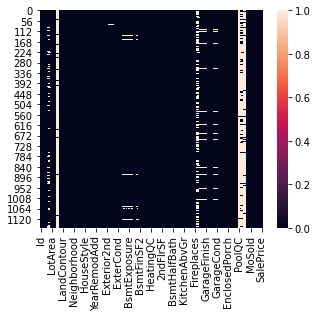

In [8]:
plt.figure(figsize=(5,4))
sb.heatmap(df.isnull())

array([nan, 'Grvl', 'Pave'], dtype=object)

In [214]:
# dropping some of columns which are irrlevent
df.drop(['Alley','PoolQC','Fence','MiscFeature'], axis=1,inplace=True)

In [215]:
df.shape # now we have 77 columns.

(1168, 77)

In [216]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [217]:
# removing some more columns here which are irrlevent and has no use in prediction 
df.drop('GarageYrBlt',axis=1,inplace =True)

In [218]:
df.drop(columns=['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF'],axis=1,inplace=True)

In [219]:
df.shape

(1168, 72)

In [220]:
df.drop('Id',axis=1,inplace=True)

In [221]:
df.shape

(1168, 71)

# Visualization

In [222]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea

# SalePrice

In [223]:
df['SalePrice'].head() # continous variable and dtype is integer.

0    128000
1    268000
2    269790
3    190000
4    215000
Name: SalePrice, dtype: int64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

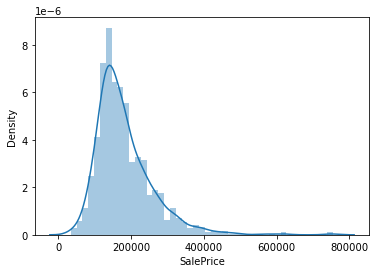

In [224]:
import warnings
warnings.filterwarnings('ignore')
sb.distplot(df['SalePrice'])


# MSZoning

In [225]:
df['MSZoning'].unique() # categorical variable

array(['RL', 'RM', 'FV', 'RH', 'C (all)'], dtype=object)

<AxesSubplot:xlabel='MSZoning', ylabel='count'>

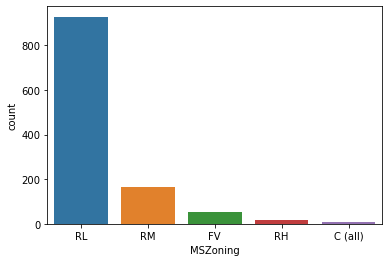

In [226]:
sb.countplot(df['MSZoning'])

# MSSubClass

In [227]:
df['MSSubClass'].unique()  # discrete variable

array([120,  20,  60,  50,  70,  30, 160,  85,  45,  90,  40,  80, 190,
        75, 180], dtype=int64)

<AxesSubplot:xlabel='MSSubClass', ylabel='Density'>

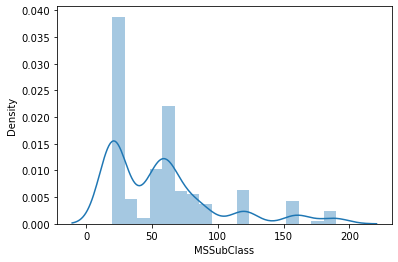

In [228]:
sb.distplot(df['MSSubClass'])

# LotFrontage

In [229]:
df['LotFrontage'].unique()      # continous variable and has dtype is float

array([ nan,  95.,  92., 105.,  58.,  88.,  70.,  80.,  50.,  44., 129.,
        59.,  55.,  64.,  24.,  68.,  71.,  74.,  61.,  60., 120.,  84.,
       141.,  30.,  65.,  76., 100.,  85.,  75., 107., 122.,  82.,  62.,
        73.,  79.,  77.,  41.,  69.,  90.,  96.,  72.,  34.,  78.,  63.,
        40.,  98., 160., 108., 128.,  51.,  81.,  99.,  66.,  37., 174.,
        87.,  53., 152.,  47.,  86.,  56.,  89.,  35.,  52.,  21., 104.,
        57.,  83.,  46., 101., 112., 149.,  93.,  49.,  43., 130.,  54.,
        91.,  67.,  97., 110., 103., 115.,  94.,  48.,  36., 313., 109.,
       144., 121., 102., 116., 182.,  32.,  42., 168., 118.,  38., 140.,
       134., 114., 124.,  39., 111.,  45., 106., 153.])

<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

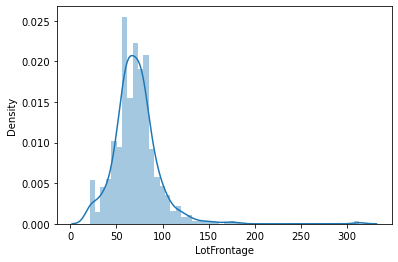

In [230]:
sb.distplot(df['LotFrontage']) # here little skewed value but also have some of the nan values 

# LotArea

In [231]:
df['LotArea'].unique()##  continous variable and dtype is integer

array([  4928,  15865,   9920,  11751,  16635,  14054,  11341,  13125,
         9170,   8480,   8600,   9548,   9196,   8892,  16466,  10592,
         5890,   7314,   7917,   2016,  12435,   8445,   9717,  10659,
         9230,  21000,  25339,  11394,   6380,  11988,   7658,   3378,
        18890,  12358,  14762,  10356,  10400,  12615,   7540,   9100,
        31770,  13300,   3180,   2522,   8385,   8314,   8123,  12000,
         5000,   7931,  14331,  10440,   8400,   8712,  11100,   9742,
        19900,  10186,   8765,  11923,   7200,   7838,   7024,  11287,
         8834,   5500,   9858,  32668,   8760,   8366,   9158,   6780,
         9020,   4270,  10637,  10410,  13891,  16196,   8990,   8635,
         9786,  10010,   7950,   6180,   8461,   7642,   9600,   9240,
         9525,   4923,  11075,   6820,   9204,   8973,   8125,   5330,
         5868,  11250,  22950,  11308,  10500,  13600,  10152,   4590,
         6960,  14803,   9317, 115149,   7259,   7700,   7500,  13031,
      

<AxesSubplot:xlabel='LotArea', ylabel='Density'>

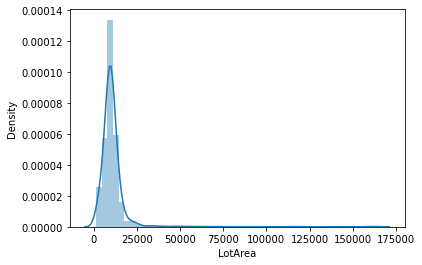

In [232]:
sb.distplot(df['LotArea'])

# Street

In [233]:
print(df['Street'].unique())
df['Street'].value_counts()   # very small propotion has Grvl here only 4  it is categorical feaure

['Pave' 'Grvl']


Pave    1164
Grvl       4
Name: Street, dtype: int64

<AxesSubplot:xlabel='Street', ylabel='count'>

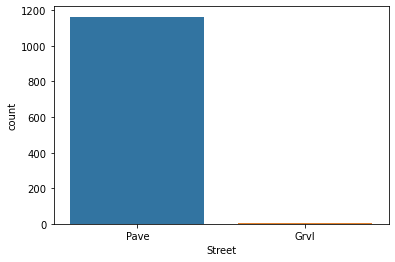

In [234]:
sb.countplot(df['Street'])

# LotShape

In [235]:
df['LotShape'].unique()  # categorical feature

array(['IR1', 'Reg', 'IR2', 'IR3'], dtype=object)

<AxesSubplot:xlabel='LotShape', ylabel='count'>

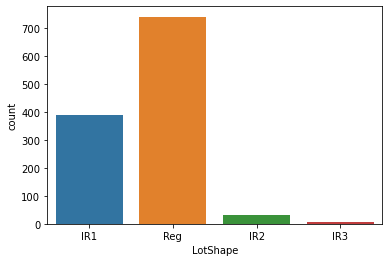

In [236]:
sb.countplot(df['LotShape']) 

# LandContour

In [237]:
df['LandContour'].unique()

array(['Lvl', 'Bnk', 'HLS', 'Low'], dtype=object)

<AxesSubplot:xlabel='LandContour', ylabel='count'>

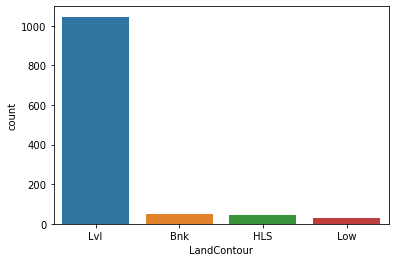

In [238]:
sb.countplot(df['LandContour'])

# Utilities

In [239]:
df['Utilities'].unique()

array(['AllPub'], dtype=object)

In [240]:
# here i am dropping Utilities cause only one type is there AllPub 
df.drop('Utilities',axis=1,inplace=True)

In [241]:
df.shape

(1168, 70)

# LotConfig

In [242]:
df['LotConfig'].unique()

array(['Inside', 'CulDSac', 'FR2', 'Corner', 'FR3'], dtype=object)

<AxesSubplot:xlabel='LotConfig', ylabel='count'>

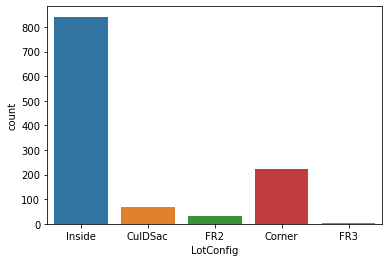

In [243]:
sb.countplot(df['LotConfig'])

AS per here analysis i am seeing some pattern , like datatype is object if columns are categoriccal and Dtype is integer or float as data type is continous, so its easy to say that we can say that categorical == object and continous == int or float

# seprating the categorical and continous data 


In [350]:
continous=['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea','1stFlrSF',
'2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
'TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
  'ScreenPorch','PoolArea','MiscVal','MoSold','YrSold','SalePrice']

In [244]:
conti=df[['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea','1stFlrSF',
'2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
'TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
  'ScreenPorch','PoolArea','MiscVal','MoSold','YrSold','SalePrice']]

In [351]:
categorical=['MSZoning','Street','LotShape','LandContour','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType',
'HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual',
'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual',
'Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition']

In [245]:
cate=df[['MSZoning','Street','LotShape','LandContour','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType',
'HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual',
'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual',
'Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition']]

<AxesSubplot:xlabel='HouseStyle', ylabel='count'>

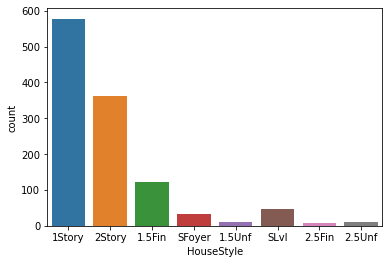

In [246]:
sb.countplot(cate['HouseStyle'])

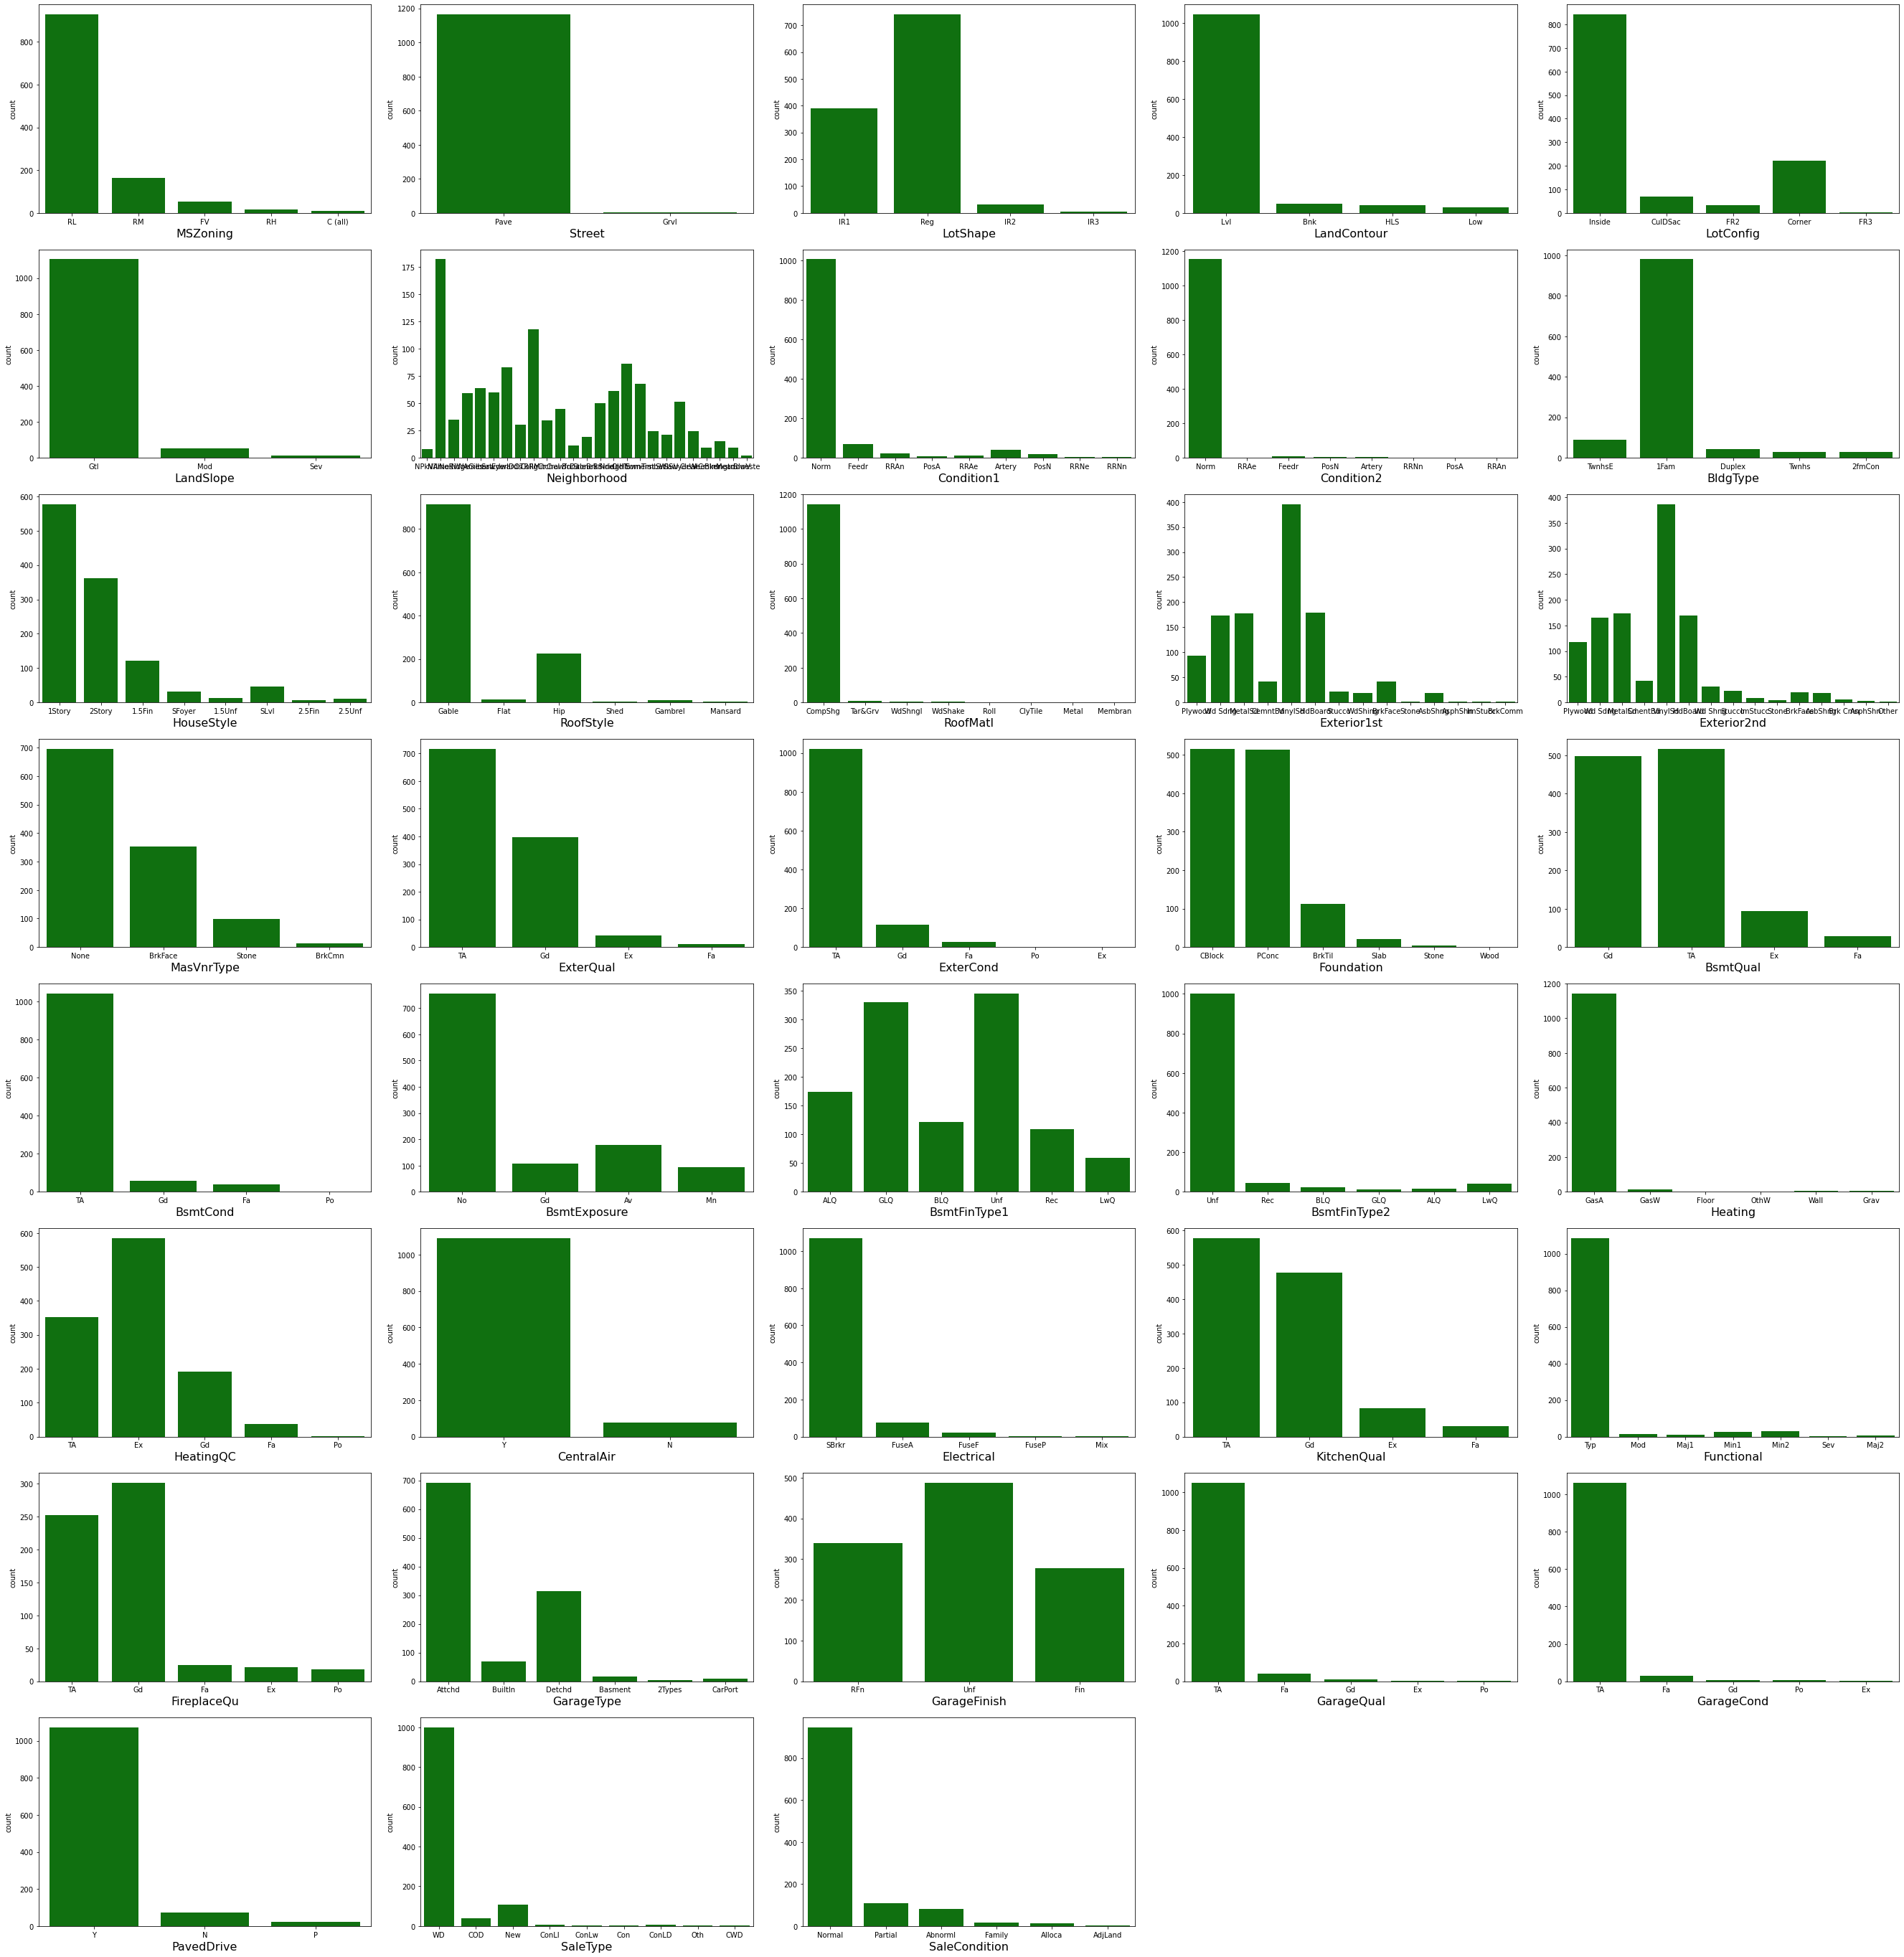

In [247]:
plt.figure(figsize=(37,38))
num=1

for columns in cate:
    
    if num<=40:
        ax=plt.subplot(8,5,num)
        sb.countplot(cate[columns],color='g')
        plt.xlabel(columns,fontsize=16)
        
    num+=1
plt.tight_layout()

All the categorical columns are here. I am ploting  some of important columns where we analysiz more in detail.

In [248]:

def feature_details(i):
    print(i,' has total unique values = ',df[i].nunique() ,'out of ',df.shape[0])
    if df[i].nunique() <10:
        print(df[i].unique())
    print('Feature datatype is = ',df[i].dtypes)
    print('Feature has ',(df[i].isnull().sum()),'missing values')
    
    if df[i].dtypes =='O':
        plt.figure(figsize=(10,8))
        sb.countplot(df[i])
        plt.show()
        print(df.groupby(i)['SalePrice'].mean().sort_values(ascending=False))
        print('The mode of :-',df[i].mode())
    elif df[i].dtypes !='O':
        sb.scatterplot(df[i],df['SalePrice'])
        plt.show()
        print('The median of :-',df[i].median())
        print('The mean of :-',df[i].mean())

MSZoning  has total unique values =  5 out of  1168
['RL' 'RM' 'FV' 'RH' 'C (all)']
Feature datatype is =  object
Feature has  0 missing values


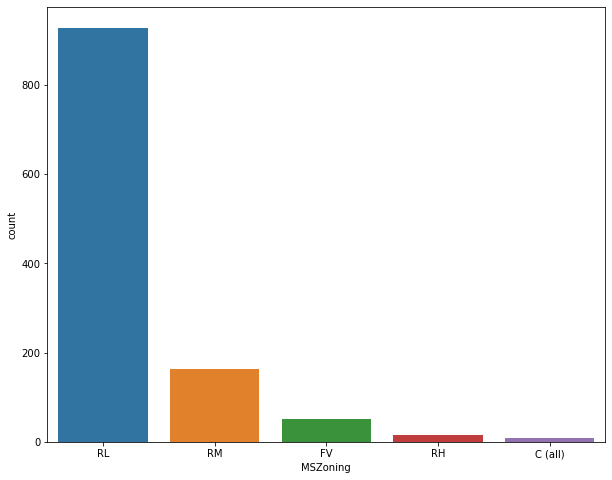

MSZoning
FV         209478.461538
RL         191004.181034
RH         131558.375000
RM         129070.975460
C (all)     75208.888889
Name: SalePrice, dtype: float64
The mode of :- 0    RL
dtype: object


In [249]:
feature_details('MSZoning')

Street  has total unique values =  2 out of  1168
['Pave' 'Grvl']
Feature datatype is =  object
Feature has  0 missing values


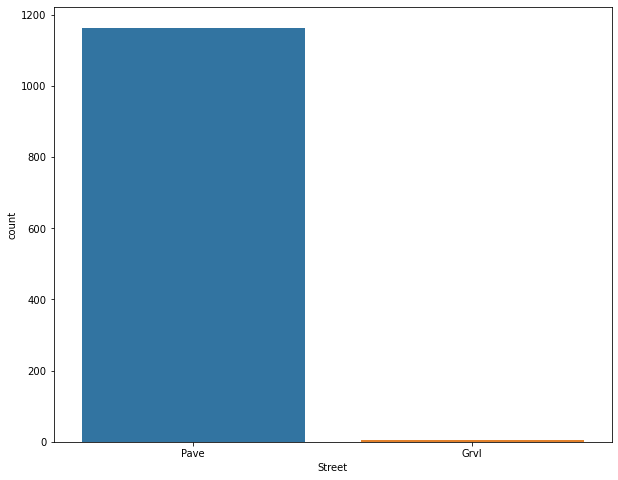

Street
Pave    181684.450172
Grvl    121110.750000
Name: SalePrice, dtype: float64
The mode of :- 0    Pave
dtype: object


In [250]:
feature_details('Street')

LotShape  has total unique values =  4 out of  1168
['IR1' 'Reg' 'IR2' 'IR3']
Feature datatype is =  object
Feature has  0 missing values


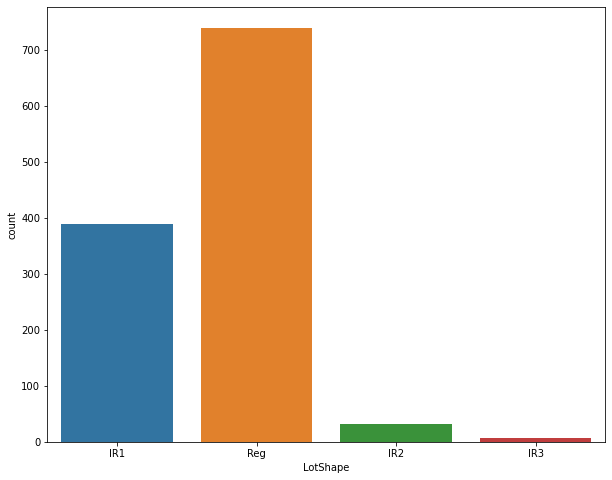

LotShape
IR2    233827.750000
IR3    226120.833333
IR1    206038.464103
Reg    165906.660811
Name: SalePrice, dtype: float64
The mode of :- 0    Reg
dtype: object


In [251]:
feature_details('LotShape')

In [252]:
cate.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

LandContour  has total unique values =  4 out of  1168
['Lvl' 'Bnk' 'HLS' 'Low']
Feature datatype is =  object
Feature has  0 missing values


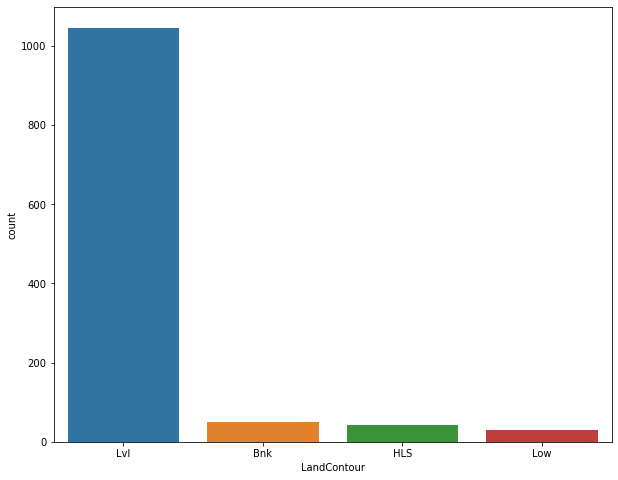

LandContour
HLS    214302.166667
Low    194393.333333
Lvl    181476.572658
Bnk    146163.140000
Name: SalePrice, dtype: float64
The mode of :- 0    Lvl
dtype: object


In [253]:
feature_details('LandContour')

LotConfig  has total unique values =  5 out of  1168
['Inside' 'CulDSac' 'FR2' 'Corner' 'FR3']
Feature datatype is =  object
Feature has  0 missing values


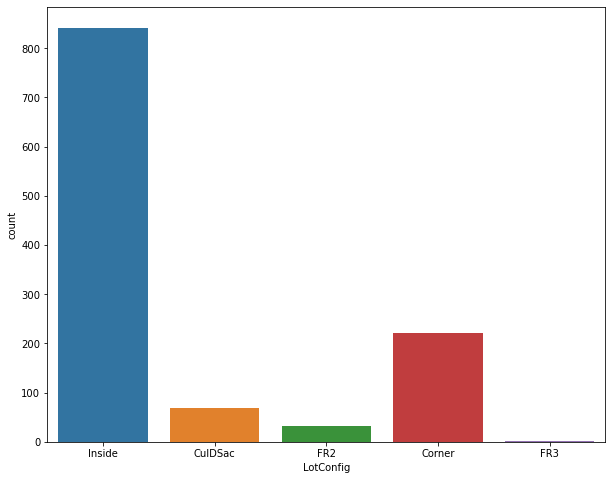

LotConfig
CulDSac    224594.463768
FR3        221500.000000
Corner     182427.635135
Inside     178003.105701
FR2        171138.636364
Name: SalePrice, dtype: float64
The mode of :- 0    Inside
dtype: object


In [254]:
feature_details('LotConfig')

LandSlope  has total unique values =  3 out of  1168
['Gtl' 'Mod' 'Sev']
Feature datatype is =  object
Feature has  0 missing values


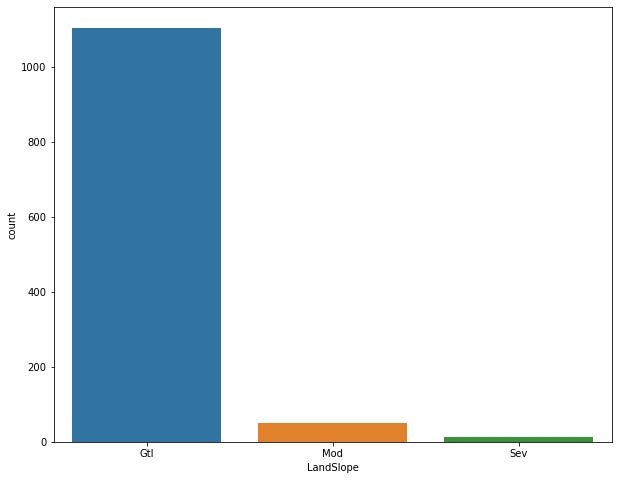

LandSlope
Sev    190160.833333
Mod    185353.313725
Gtl    181203.795475
Name: SalePrice, dtype: float64
The mode of :- 0    Gtl
dtype: object


In [255]:
feature_details('LandSlope')

Neighborhood  has total unique values =  25 out of  1168
Feature datatype is =  object
Feature has  0 missing values


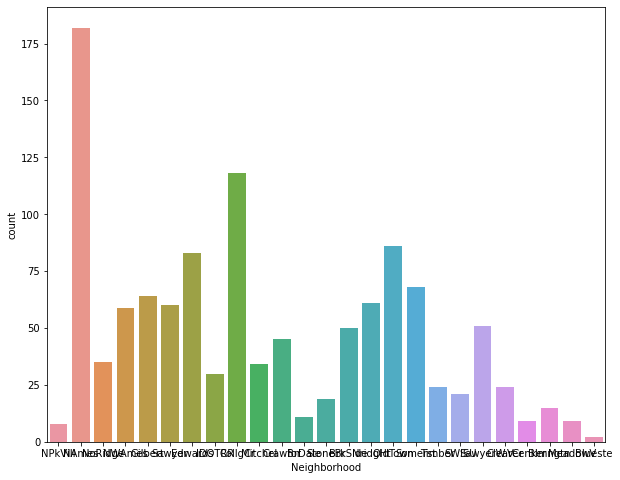

Neighborhood
NoRidge    341260.228571
NridgHt    312548.655738
StoneBr    301145.736842
Veenker    246833.333333
Timber     240579.291667
Somerst    222649.588235
ClearCr    216120.833333
Crawfor    208474.688889
CollgCr    199517.508475
Blmngtn    195987.000000
Gilbert    194790.093750
NWAmes     191643.305085
SawyerW    186909.647059
Mitchel    154654.411765
NAmes      146511.225275
SWISU      142587.333333
NPkVill    141968.750000
Blueste    137500.000000
Sawyer     135029.866667
OldTown    133947.197674
Edwards    128544.216867
BrkSide    122836.000000
BrDale     104081.818182
IDOTRR     101322.666667
MeadowV     88444.444444
Name: SalePrice, dtype: float64
The mode of :- 0    NAmes
dtype: object


In [256]:
feature_details('Neighborhood')

Condition1  has total unique values =  9 out of  1168
['Norm' 'Feedr' 'RRAn' 'PosA' 'RRAe' 'Artery' 'PosN' 'RRNe' 'RRNn']
Feature datatype is =  object
Feature has  0 missing values


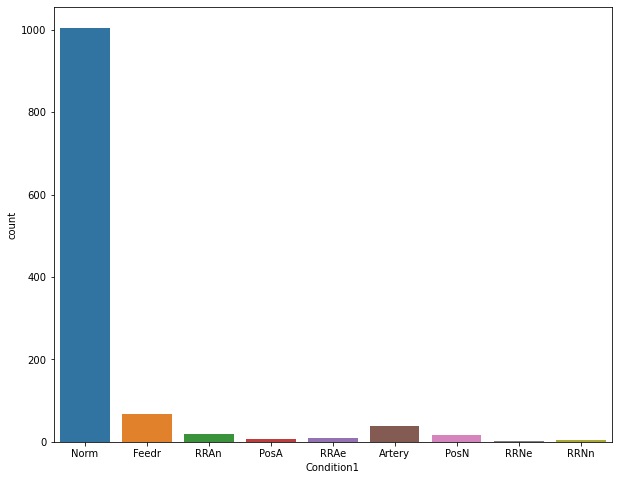

Condition1
RRNn      238000.000000
PosA      237833.333333
PosN      219264.705882
RRNe      190750.000000
RRAn      190074.850000
Norm      184692.003980
Feedr     142799.731343
RRAe      139044.444444
Artery    137926.315789
Name: SalePrice, dtype: float64
The mode of :- 0    Norm
dtype: object


In [257]:
feature_details('Condition1')

Condition2  has total unique values =  8 out of  1168
['Norm' 'RRAe' 'Feedr' 'PosN' 'Artery' 'RRNn' 'PosA' 'RRAn']
Feature datatype is =  object
Feature has  0 missing values


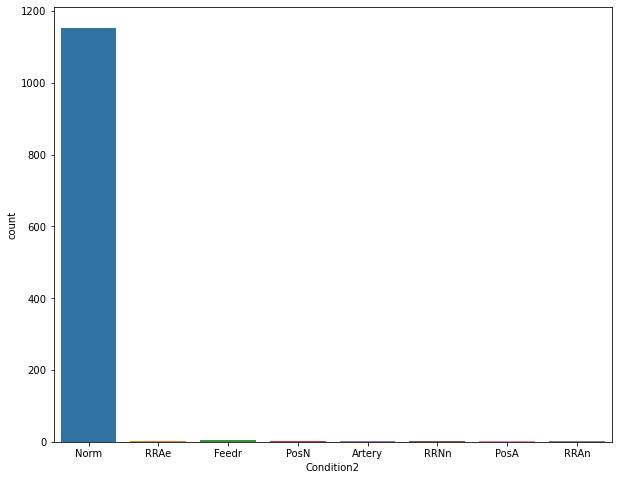

Condition2
PosA      325000.000000
PosN      284875.000000
RRAe      190000.000000
Norm      181697.129983
RRAn      136905.000000
RRNn      125000.000000
Feedr     121166.666667
Artery    106500.000000
Name: SalePrice, dtype: float64
The mode of :- 0    Norm
dtype: object


In [258]:
feature_details('Condition2')

BldgType  has total unique values =  5 out of  1168
['TwnhsE' '1Fam' 'Duplex' 'Twnhs' '2fmCon']
Feature datatype is =  object
Feature has  0 missing values


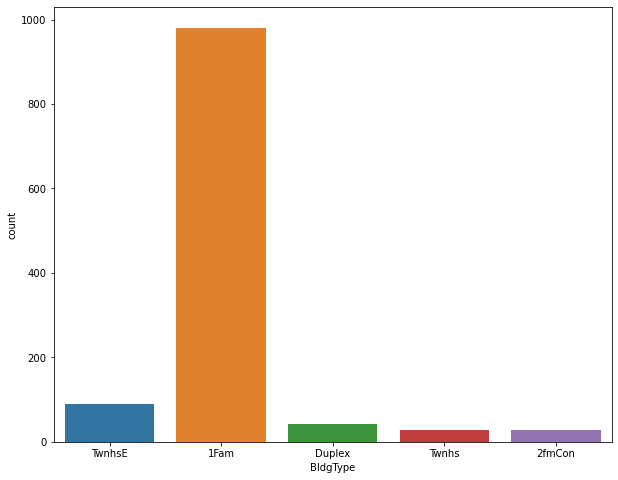

BldgType
TwnhsE    186066.111111
1Fam      185602.300714
Twnhs     139437.931034
Duplex    133871.609756
2fmCon    133737.037037
Name: SalePrice, dtype: float64
The mode of :- 0    1Fam
dtype: object


In [259]:
feature_details('BldgType')

HouseStyle  has total unique values =  8 out of  1168
['1Story' '2Story' '1.5Fin' 'SFoyer' '1.5Unf' 'SLvl' '2.5Fin' '2.5Unf']
Feature datatype is =  object
Feature has  0 missing values


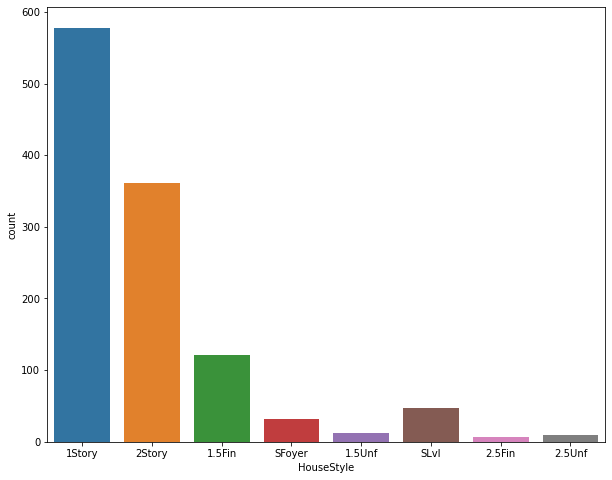

HouseStyle
2.5Fin    223285.714286
2Story    212193.515235
1Story    175940.826990
SLvl      170140.851064
2.5Unf    158690.000000
1.5Fin    138546.363636
SFoyer    137508.000000
1.5Unf    113216.666667
Name: SalePrice, dtype: float64
The mode of :- 0    1Story
dtype: object


In [260]:
feature_details('HouseStyle')

RoofStyle  has total unique values =  6 out of  1168
['Gable' 'Flat' 'Hip' 'Shed' 'Gambrel' 'Mansard']
Feature datatype is =  object
Feature has  0 missing values


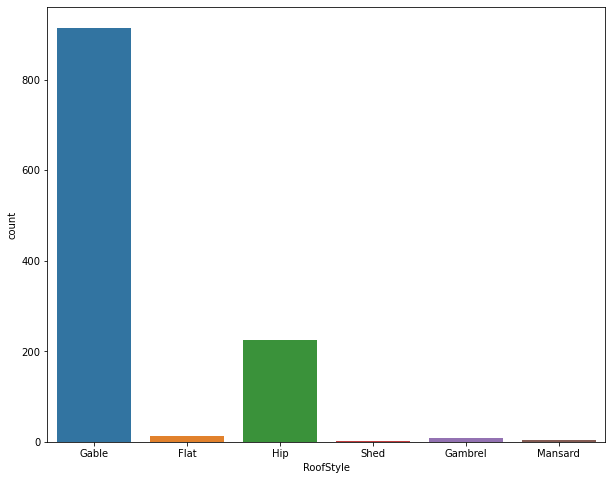

RoofStyle
Shed       225000.000000
Hip        214493.364444
Flat       204080.833333
Mansard    194795.800000
Gable      173251.570492
Gambrel    145111.111111
Name: SalePrice, dtype: float64
The mode of :- 0    Gable
dtype: object


In [261]:
feature_details('RoofStyle')

RoofMatl  has total unique values =  8 out of  1168
['CompShg' 'Tar&Grv' 'WdShngl' 'WdShake' 'Roll' 'ClyTile' 'Metal'
 'Membran']
Feature datatype is =  object
Feature has  0 missing values


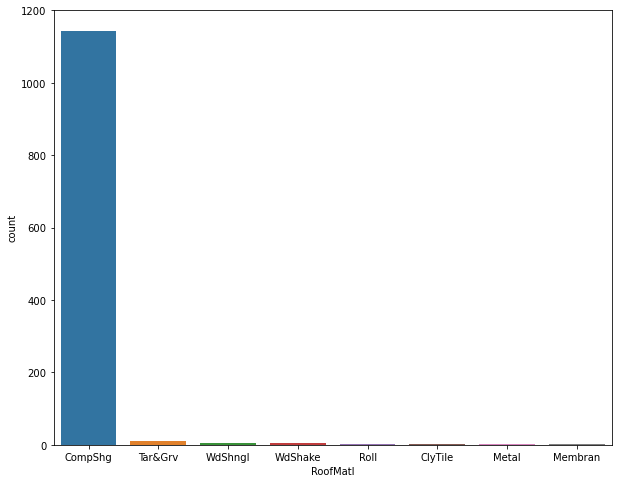

RoofMatl
WdShngl    390250.000000
WdShake    254250.000000
Membran    241500.000000
Tar&Grv    195747.000000
CompShg    180009.329545
Metal      180000.000000
ClyTile    160000.000000
Roll       137000.000000
Name: SalePrice, dtype: float64
The mode of :- 0    CompShg
dtype: object


In [262]:
feature_details('RoofMatl')

Exterior1st  has total unique values =  14 out of  1168
Feature datatype is =  object
Feature has  0 missing values


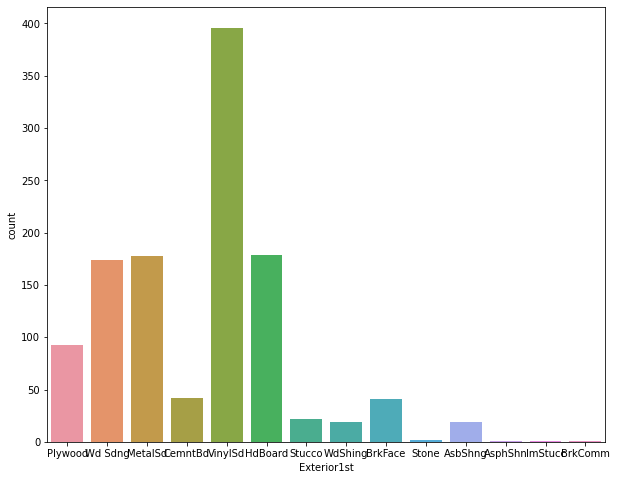

Exterior1st
ImStucc    262000.000000
Stone      258500.000000
CemntBd    242928.476190
VinylSd    215359.676768
BrkFace    198391.463415
Plywood    178890.075269
HdBoard    163432.648045
Stucco     160602.272727
WdShing    155481.578947
Wd Sdng    152572.724138
MetalSd    148498.196629
AsbShng    107774.263158
AsphShn    100000.000000
BrkComm     60000.000000
Name: SalePrice, dtype: float64
The mode of :- 0    VinylSd
dtype: object


In [263]:
feature_details('Exterior1st')

Exterior2nd  has total unique values =  15 out of  1168
Feature datatype is =  object
Feature has  0 missing values


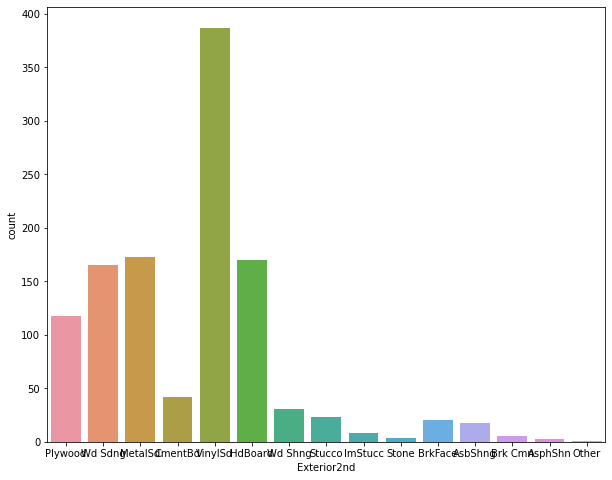

Exterior2nd
Other      319000.000000
ImStucc    273712.500000
CmentBd    247940.380952
VinylSd    215607.100775
BrkFace    194772.500000
Stone      174406.000000
Plywood    169979.042373
HdBoard    168398.200000
Wd Shng    156650.000000
Stucco     153066.695652
Wd Sdng    152218.969697
MetalSd    148570.398844
AsphShn    138000.000000
Brk Cmn    131300.000000
AsbShng    114372.833333
Name: SalePrice, dtype: float64
The mode of :- 0    VinylSd
dtype: object


In [264]:
feature_details('Exterior2nd')

MasVnrType  has total unique values =  4 out of  1168
['None' 'BrkFace' 'Stone' 'BrkCmn' nan]
Feature datatype is =  object
Feature has  7 missing values


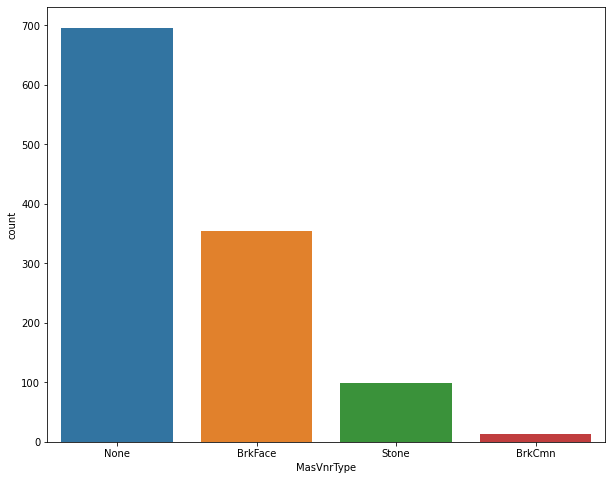

MasVnrType
Stone      261417.867347
BrkFace    205275.432203
None       158226.787356
BrkCmn     141990.076923
Name: SalePrice, dtype: float64
The mode of :- 0    None
dtype: object


In [265]:
feature_details('MasVnrType')

###  7 missing values.

ExterQual  has total unique values =  4 out of  1168
['TA' 'Gd' 'Ex' 'Fa']
Feature datatype is =  object
Feature has  0 missing values


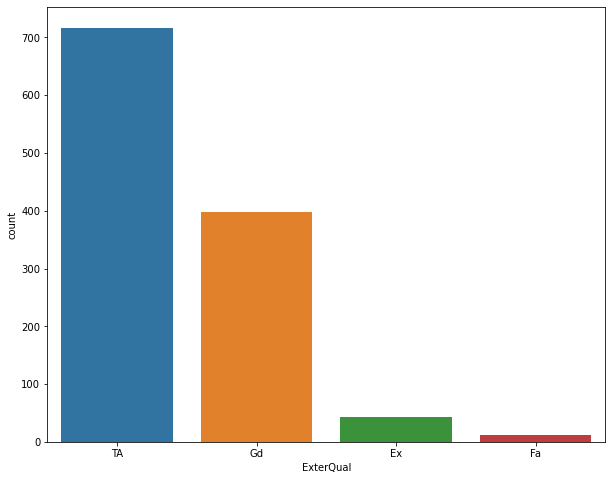

ExterQual
Ex    357817.651163
Gd    231009.743073
TA    144918.163180
Fa     87435.727273
Name: SalePrice, dtype: float64
The mode of :- 0    TA
dtype: object


In [266]:
feature_details('ExterQual')

ExterQual: Evaluates the quality of the material on the exterior 
    
   - Ex = Excellent
   - Gd = Good
   - TA = Average/Typical
   - Fa = Fair
   - Po = Poor

ExterCond  has total unique values =  5 out of  1168
['TA' 'Gd' 'Fa' 'Po' 'Ex']
Feature datatype is =  object
Feature has  0 missing values


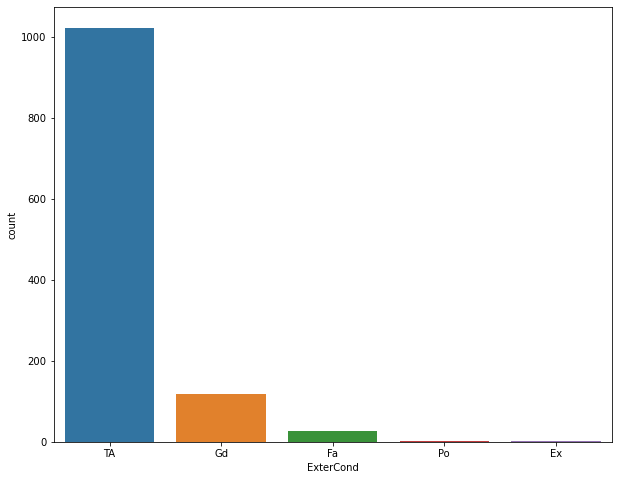

ExterCond
Ex    243000.000000
TA    184551.990215
Gd    171391.837607
Fa    105294.769231
Po     76500.000000
Name: SalePrice, dtype: float64
The mode of :- 0    TA
dtype: object


In [267]:
feature_details('ExterCond')

Foundation  has total unique values =  6 out of  1168
['CBlock' 'PConc' 'BrkTil' 'Slab' 'Stone' 'Wood']
Feature datatype is =  object
Feature has  0 missing values


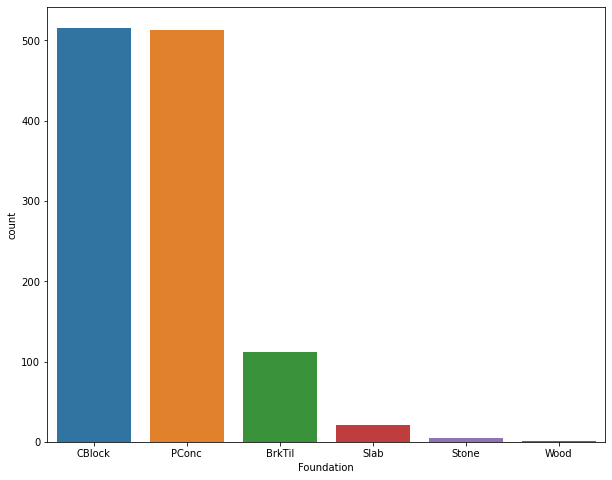

Foundation
PConc     225757.504873
Stone     177651.000000
Wood      164000.000000
CBlock    149858.994186
BrkTil    137895.285714
Slab      110846.428571
Name: SalePrice, dtype: float64
The mode of :- 0    CBlock
dtype: object


In [268]:
feature_details('Foundation')

BsmtQual  has total unique values =  4 out of  1168
['Gd' 'TA' 'Ex' nan 'Fa']
Feature datatype is =  object
Feature has  30 missing values


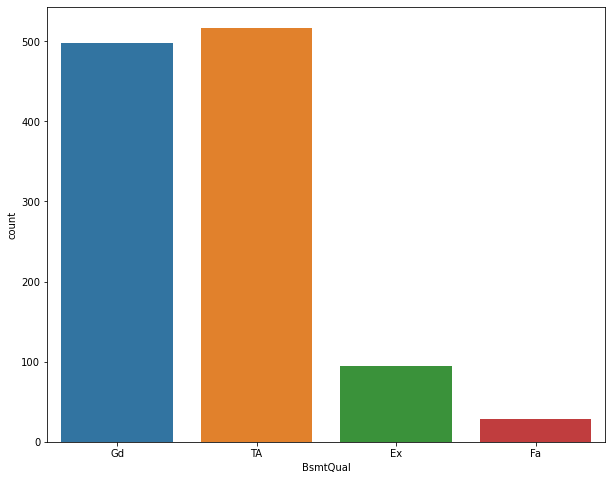

BsmtQual
Ex    331469.978723
Gd    203225.445783
TA    140898.736944
Fa    121349.000000
Name: SalePrice, dtype: float64
The mode of :- 0    TA
dtype: object


In [269]:
feature_details('BsmtQual')

#### 30 missing values 

BsmtCond  has total unique values =  4 out of  1168
['TA' 'Gd' 'Fa' nan 'Po']
Feature datatype is =  object
Feature has  30 missing values


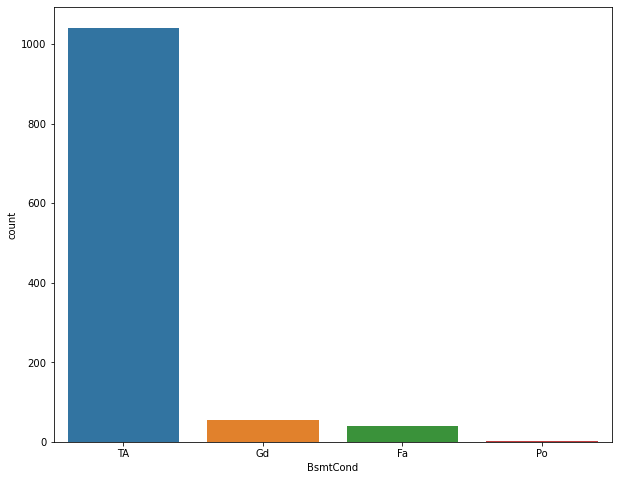

BsmtCond
Gd    219908.107143
TA    184018.669549
Fa    121075.102564
Po     64000.000000
Name: SalePrice, dtype: float64
The mode of :- 0    TA
dtype: object


In [270]:
feature_details('BsmtCond')

#### 30 missing values

BsmtExposure  has total unique values =  4 out of  1168
['No' 'Gd' 'Av' 'Mn' nan]
Feature datatype is =  object
Feature has  31 missing values


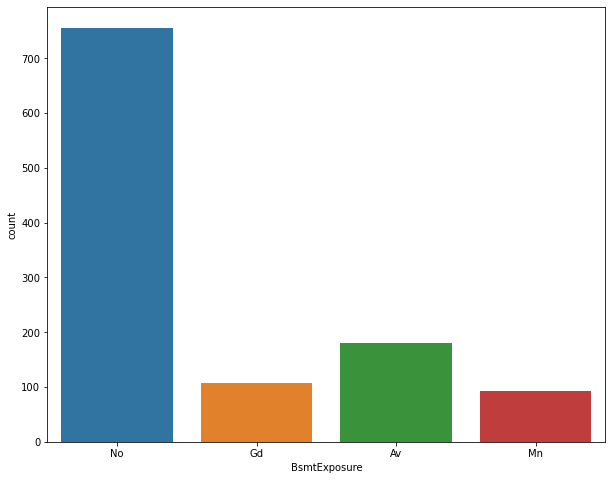

BsmtExposure
Gd    250581.138889
Av    204174.861111
Mn    194213.838710
No    167539.144180
Name: SalePrice, dtype: float64
The mode of :- 0    No
dtype: object


In [271]:
feature_details('BsmtExposure')

### 31 missing values 

BsmtFinType1  has total unique values =  6 out of  1168
['ALQ' 'GLQ' 'BLQ' 'Unf' 'Rec' 'LwQ' nan]
Feature datatype is =  object
Feature has  30 missing values


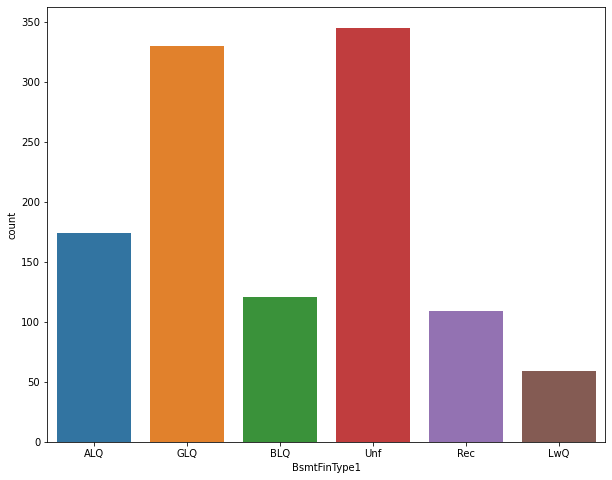

BsmtFinType1
GLQ    236871.596970
Unf    172159.521739
ALQ    161003.879310
BLQ    152803.396694
LwQ    152712.711864
Rec    143592.844037
Name: SalePrice, dtype: float64
The mode of :- 0    Unf
dtype: object


In [272]:
feature_details('BsmtFinType1')

BsmtFinType2  has total unique values =  6 out of  1168
['Unf' 'Rec' 'BLQ' 'GLQ' nan 'ALQ' 'LwQ']
Feature datatype is =  object
Feature has  31 missing values


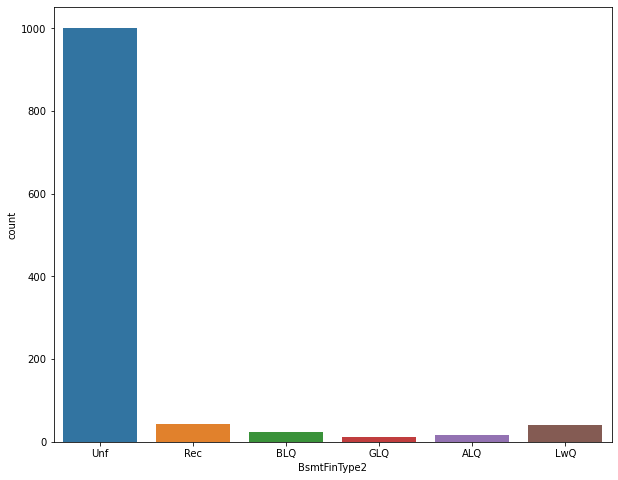

BsmtFinType2
GLQ    194937.500000
ALQ    194712.500000
Unf    185077.455090
LwQ    168846.250000
Rec    164477.325581
BLQ    154815.958333
Name: SalePrice, dtype: float64
The mode of :- 0    Unf
dtype: object


In [273]:
feature_details('BsmtFinType2')

#### 31 missing values 

Heating  has total unique values =  6 out of  1168
['GasA' 'GasW' 'Floor' 'OthW' 'Wall' 'Grav']
Feature datatype is =  object
Feature has  0 missing values


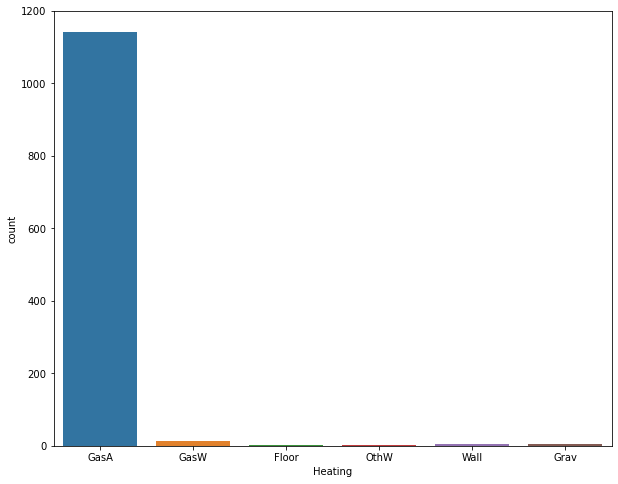

Heating
GasA     182591.394576
GasW     167312.785714
OthW     129500.000000
Wall      92100.000000
Floor     72500.000000
Grav      70080.000000
Name: SalePrice, dtype: float64
The mode of :- 0    GasA
dtype: object


In [274]:
feature_details('Heating')

HeatingQC  has total unique values =  5 out of  1168
['TA' 'Ex' 'Gd' 'Fa' 'Po']
Feature datatype is =  object
Feature has  0 missing values


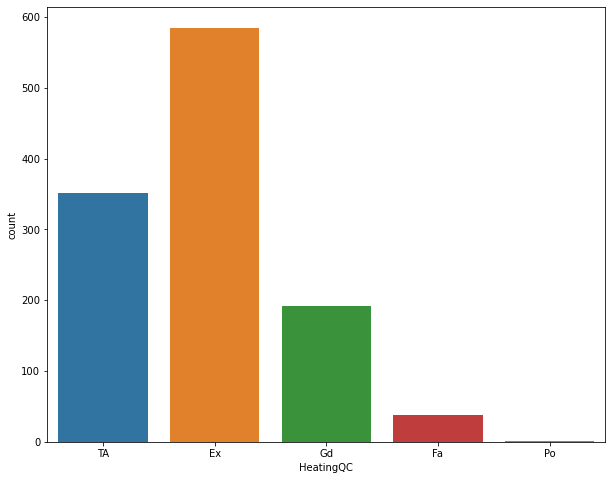

HeatingQC
Ex    215954.223932
Gd    158909.833333
TA    142684.883523
Fa    126556.710526
Po     87000.000000
Name: SalePrice, dtype: float64
The mode of :- 0    Ex
dtype: object


In [275]:
feature_details('HeatingQC')

CentralAir  has total unique values =  2 out of  1168
['Y' 'N']
Feature datatype is =  object
Feature has  0 missing values


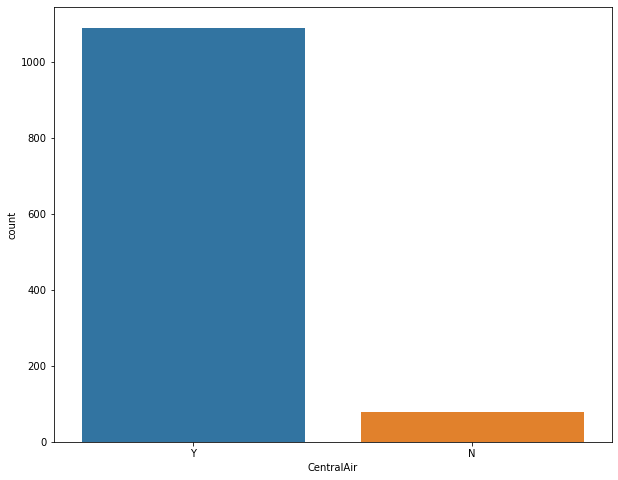

CentralAir
Y    186696.381651
N    108539.576923
Name: SalePrice, dtype: float64
The mode of :- 0    Y
dtype: object


In [276]:
feature_details('CentralAir')

Electrical  has total unique values =  5 out of  1168
['SBrkr' 'FuseA' 'FuseF' 'FuseP' 'Mix']
Feature datatype is =  object
Feature has  0 missing values


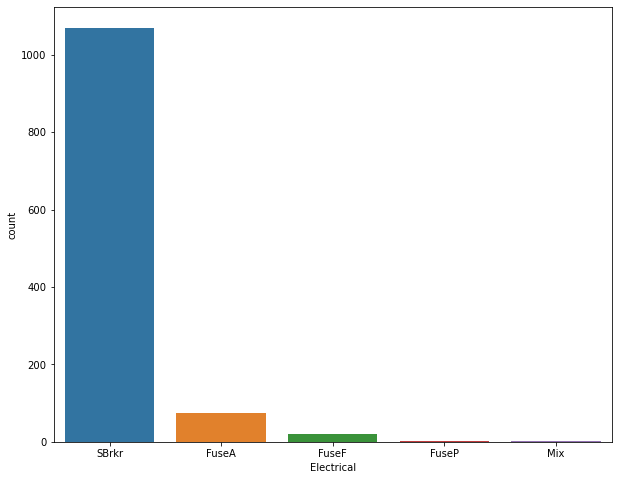

Electrical
SBrkr    187253.339252
FuseA    121840.986486
FuseF    109611.285714
FuseP    109500.000000
Mix       67000.000000
Name: SalePrice, dtype: float64
The mode of :- 0    SBrkr
dtype: object


In [277]:
feature_details('Electrical')

KitchenQual  has total unique values =  4 out of  1168
['TA' 'Gd' 'Ex' 'Fa']
Feature datatype is =  object
Feature has  0 missing values


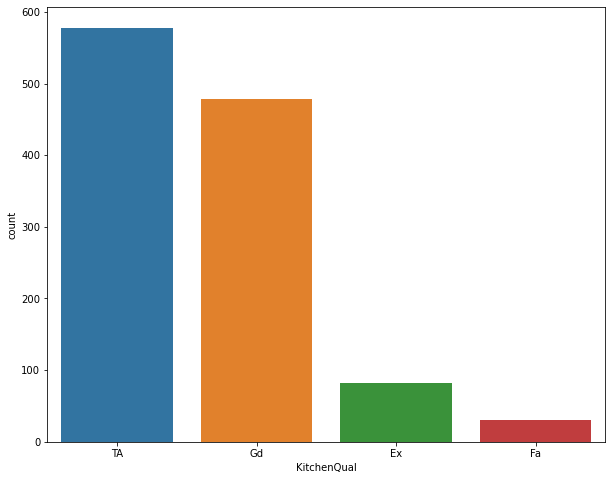

KitchenQual
Ex    327812.329268
Gd    211076.234310
TA    140206.313149
Fa    105028.100000
Name: SalePrice, dtype: float64
The mode of :- 0    TA
dtype: object


In [278]:
feature_details('KitchenQual')

Functional  has total unique values =  7 out of  1168
['Typ' 'Mod' 'Maj1' 'Min1' 'Min2' 'Sev' 'Maj2']
Feature datatype is =  object
Feature has  0 missing values


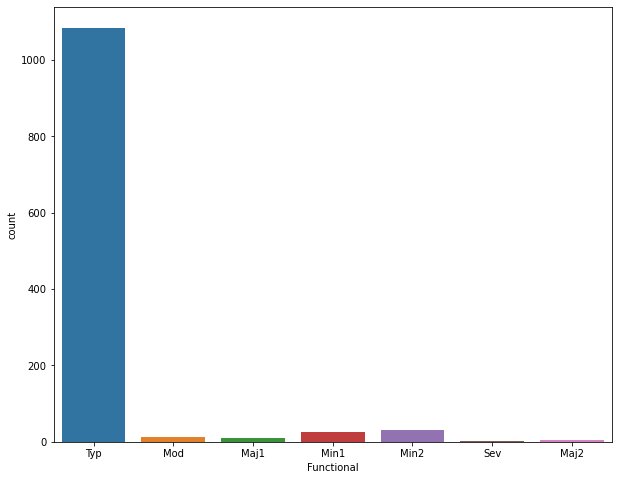

Functional
Typ     184204.948387
Min1    152630.000000
Maj1    151443.090909
Min2    146841.666667
Mod     145241.666667
Sev     129000.000000
Maj2     86000.000000
Name: SalePrice, dtype: float64
The mode of :- 0    Typ
dtype: object


In [279]:
feature_details('Functional')

FireplaceQu  has total unique values =  5 out of  1168
['TA' 'Gd' nan 'Fa' 'Ex' 'Po']
Feature datatype is =  object
Feature has  551 missing values


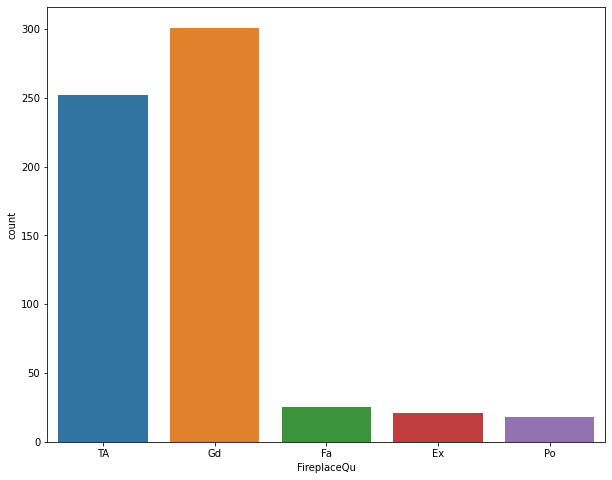

FireplaceQu
Ex    346091.142857
Gd    221925.581395
TA    209946.753968
Fa    166214.000000
Po    131487.944444
Name: SalePrice, dtype: float64
The mode of :- 0    Gd
dtype: object


In [280]:
feature_details('FireplaceQu')

#### 551 missing values 

GarageType  has total unique values =  6 out of  1168
['Attchd' 'BuiltIn' 'Detchd' 'Basment' nan '2Types' 'CarPort']
Feature datatype is =  object
Feature has  64 missing values


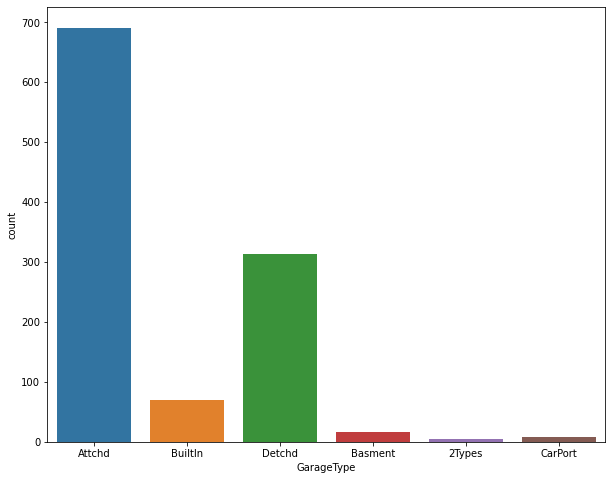

GarageType
BuiltIn    254970.900000
Attchd     203675.839363
Basment    160708.937500
2Types     144200.000000
Detchd     135873.799363
CarPort    109957.375000
Name: SalePrice, dtype: float64
The mode of :- 0    Attchd
dtype: object


In [281]:
feature_details('GarageType')

GarageFinish  has total unique values =  3 out of  1168
['RFn' 'Unf' 'Fin' nan]
Feature datatype is =  object
Feature has  64 missing values


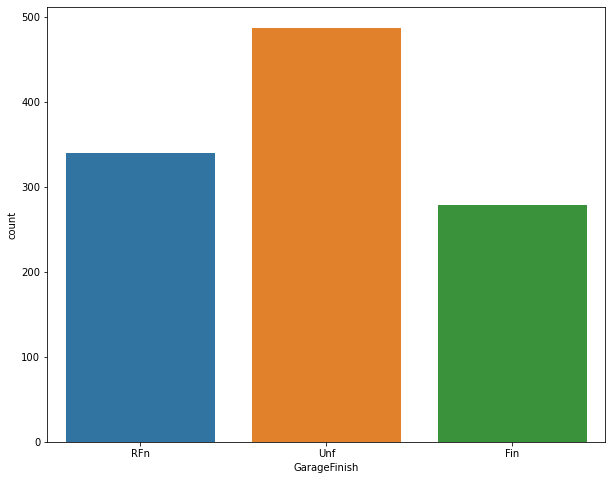

GarageFinish
Fin    241223.809353
RFn    201925.554572
Unf    143555.156057
Name: SalePrice, dtype: float64
The mode of :- 0    Unf
dtype: object


In [282]:
feature_details('GarageFinish')

GarageQual  has total unique values =  5 out of  1168
['TA' 'Fa' nan 'Gd' 'Ex' 'Po']
Feature datatype is =  object
Feature has  64 missing values


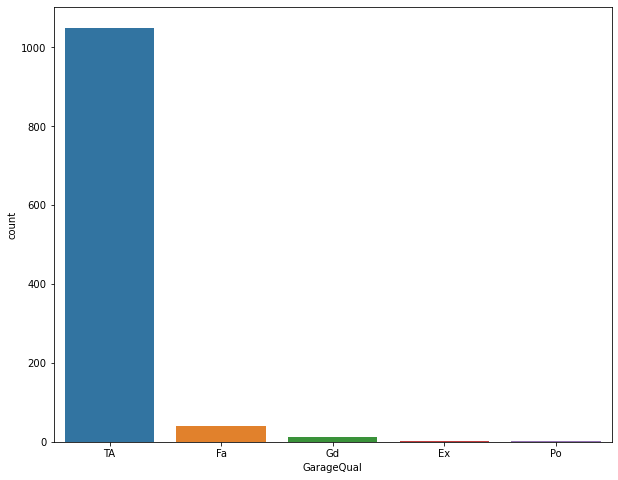

GarageQual
Ex    297750.000000
Gd    219822.727273
TA    187753.449524
Fa    129889.000000
Po    102000.000000
Name: SalePrice, dtype: float64
The mode of :- 0    TA
dtype: object


In [283]:
feature_details('GarageQual')

#### 64 missing values 

GarageCond  has total unique values =  5 out of  1168
['TA' 'Fa' 'Gd' nan 'Po' 'Ex']
Feature datatype is =  object
Feature has  64 missing values


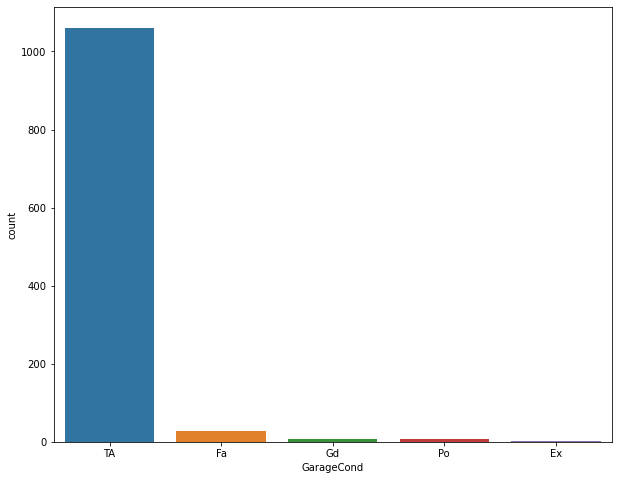

GarageCond
TA    188483.112158
Gd    179921.250000
Ex    120500.000000
Fa    115031.821429
Po    110500.000000
Name: SalePrice, dtype: float64
The mode of :- 0    TA
dtype: object


In [284]:
feature_details('GarageCond')

#### 64 missing values

PavedDrive  has total unique values =  3 out of  1168
['Y' 'N' 'P']
Feature datatype is =  object
Feature has  0 missing values


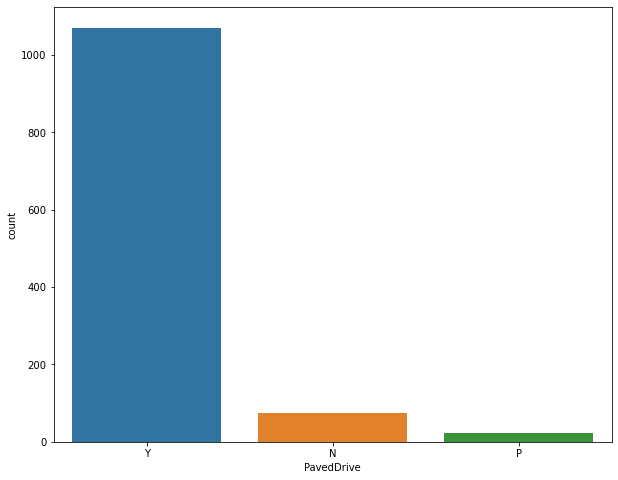

PavedDrive
Y    187006.026144
P    133326.086957
N    116421.472973
Name: SalePrice, dtype: float64
The mode of :- 0    Y
dtype: object


In [285]:
feature_details('PavedDrive')

SaleType  has total unique values =  9 out of  1168
['WD' 'COD' 'New' 'ConLI' 'ConLw' 'Con' 'ConLD' 'Oth' 'CWD']
Feature datatype is =  object
Feature has  0 missing values


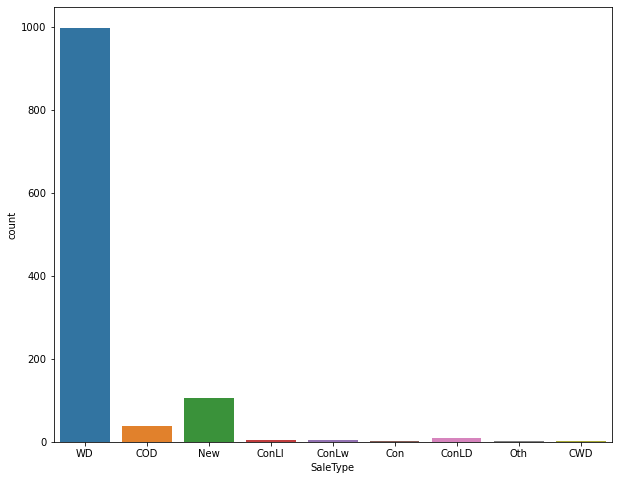

SaleType
New      271104.500000
Con      269600.000000
ConLI    200390.000000
WD       173668.456456
CWD      171166.666667
COD      146722.368421
ConLD    146141.000000
ConLw    143625.000000
Oth      119850.000000
Name: SalePrice, dtype: float64
The mode of :- 0    WD
dtype: object


In [286]:
feature_details('SaleType')

SaleCondition  has total unique values =  6 out of  1168
['Normal' 'Partial' 'Abnorml' 'Family' 'Alloca' 'AdjLand']
Feature datatype is =  object
Feature has  0 missing values


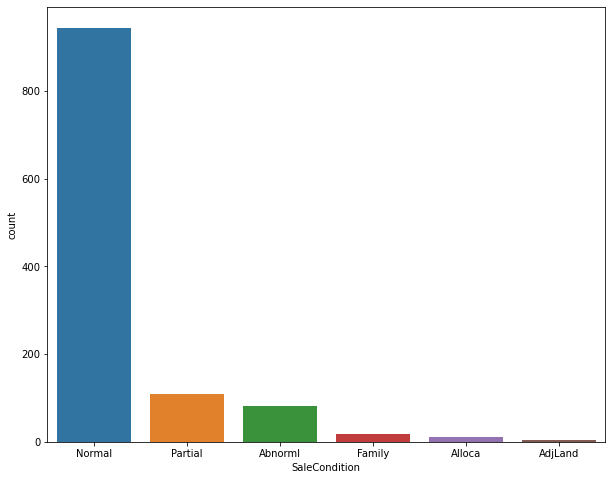

SaleCondition
Partial    269585.231481
Normal     175436.408466
Alloca     167377.416667
Family     149138.888889
Abnorml    147567.938272
AdjLand    104125.000000
Name: SalePrice, dtype: float64
The mode of :- 0    Normal
dtype: object


In [287]:
feature_details('SaleCondition')

MSSubClass  has total unique values =  15 out of  1168
Feature datatype is =  int64
Feature has  0 missing values


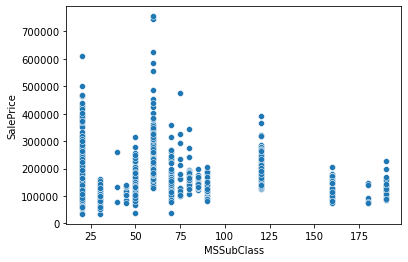

The median of :- 50.0
The mean of :- 56.767979452054796


In [288]:
feature_details('MSSubClass')

In [289]:
conti.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

LotFrontage  has total unique values =  106 out of  1168
Feature datatype is =  float64
Feature has  214 missing values


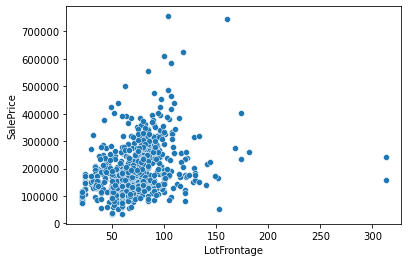

The median of :- 70.0
The mean of :- 70.98846960167715


In [290]:
feature_details('LotFrontage')

LotArea  has total unique values =  892 out of  1168
Feature datatype is =  int64
Feature has  0 missing values


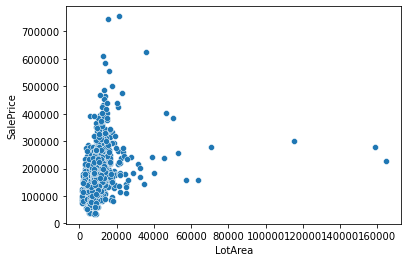

The median of :- 9522.5
The mean of :- 10484.749143835616


In [291]:
feature_details('LotArea')

OverallQual  has total unique values =  10 out of  1168
Feature datatype is =  int64
Feature has  0 missing values


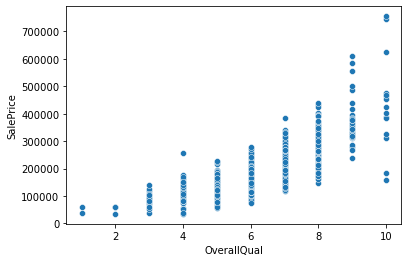

The median of :- 6.0
The mean of :- 6.10445205479452


In [292]:
feature_details('OverallQual')

OverallCond  has total unique values =  9 out of  1168
[5 6 7 4 8 2 3 9 1]
Feature datatype is =  int64
Feature has  0 missing values


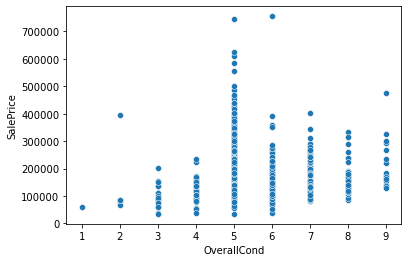

The median of :- 5.0
The mean of :- 5.595890410958904


In [293]:
feature_details('OverallCond')

YearBuilt  has total unique values =  110 out of  1168
Feature datatype is =  int64
Feature has  0 missing values


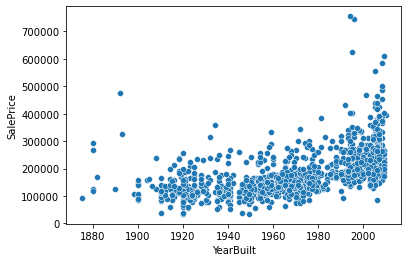

The median of :- 1972.0
The mean of :- 1970.9306506849316


In [294]:
feature_details('YearBuilt')

YearRemodAdd  has total unique values =  61 out of  1168
Feature datatype is =  int64
Feature has  0 missing values


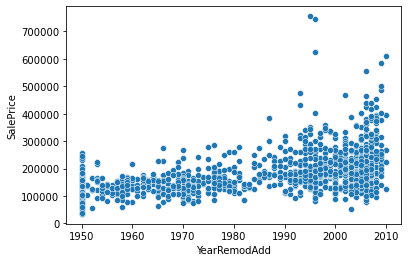

The median of :- 1993.0
The mean of :- 1984.7585616438357


In [295]:
feature_details('YearRemodAdd')

MasVnrArea  has total unique values =  283 out of  1168
Feature datatype is =  float64
Feature has  7 missing values


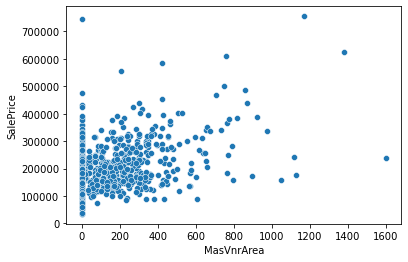

The median of :- 0.0
The mean of :- 102.31007751937985


In [296]:
feature_details('MasVnrArea')

1stFlrSF  has total unique values =  669 out of  1168
Feature datatype is =  int64
Feature has  0 missing values


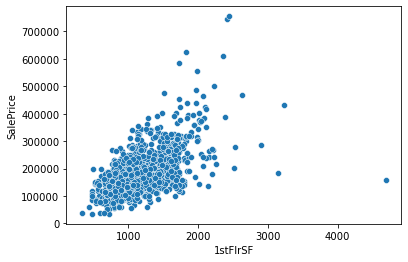

The median of :- 1096.5
The mean of :- 1169.8604452054794


In [297]:
feature_details('1stFlrSF')

2ndFlrSF  has total unique values =  351 out of  1168
Feature datatype is =  int64
Feature has  0 missing values


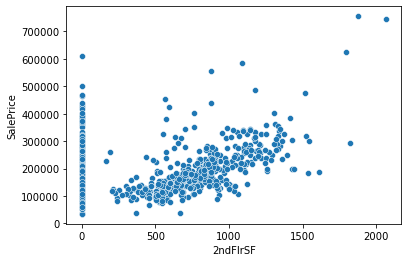

The median of :- 0.0
The mean of :- 348.826198630137


In [298]:
feature_details('2ndFlrSF')

LowQualFinSF  has total unique values =  21 out of  1168
Feature datatype is =  int64
Feature has  0 missing values


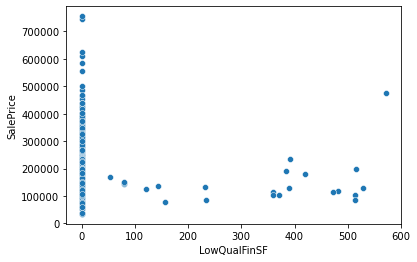

The median of :- 0.0
The mean of :- 6.38013698630137


In [299]:
feature_details('LowQualFinSF')

GrLivArea  has total unique values =  746 out of  1168
Feature datatype is =  int64
Feature has  0 missing values


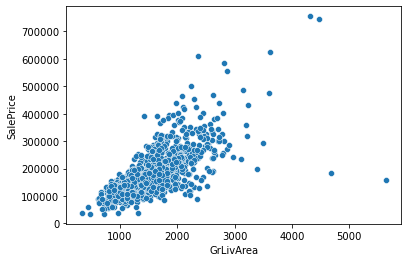

The median of :- 1468.5
The mean of :- 1525.0667808219177


In [300]:
feature_details('GrLivArea')

BsmtFullBath  has total unique values =  4 out of  1168
[0 1 2 3]
Feature datatype is =  int64
Feature has  0 missing values


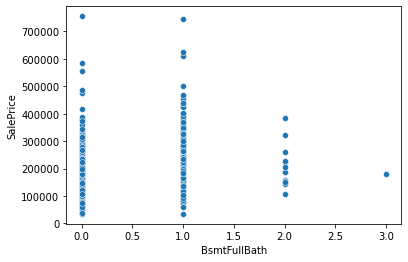

The median of :- 0.0
The mean of :- 0.425513698630137


In [301]:
feature_details('BsmtFullBath')

BsmtHalfBath  has total unique values =  3 out of  1168
[0 1 2]
Feature datatype is =  int64
Feature has  0 missing values


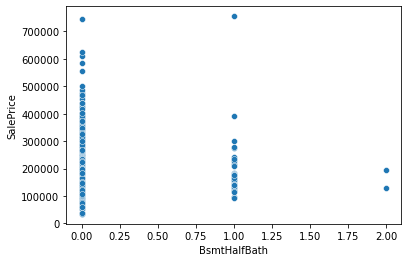

The median of :- 0.0
The mean of :- 0.05565068493150685


In [302]:
feature_details('BsmtHalfBath')

FullBath  has total unique values =  4 out of  1168
[2 1 3 0]
Feature datatype is =  int64
Feature has  0 missing values


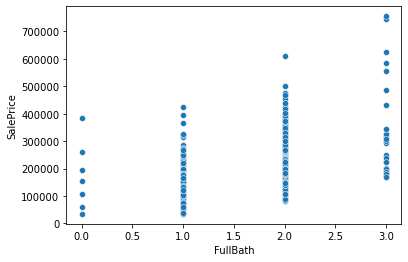

The median of :- 2.0
The mean of :- 1.5625


In [303]:
feature_details('FullBath')

HalfBath  has total unique values =  3 out of  1168
[0 1 2]
Feature datatype is =  int64
Feature has  0 missing values


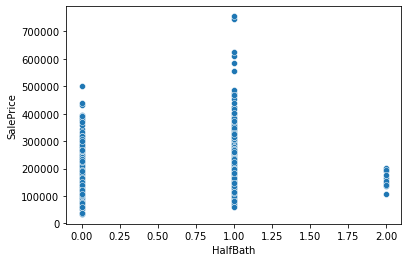

The median of :- 0.0
The mean of :- 0.3886986301369863


In [304]:
feature_details('HalfBath')

BedroomAbvGr  has total unique values =  8 out of  1168
[2 4 3 1 5 0 6 8]
Feature datatype is =  int64
Feature has  0 missing values


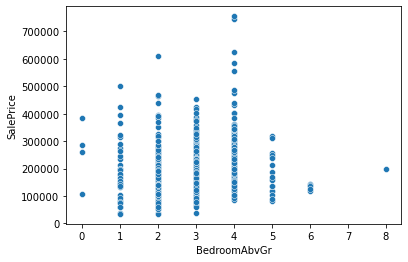

The median of :- 3.0
The mean of :- 2.8844178082191783


In [305]:
feature_details('BedroomAbvGr')

In [306]:
conti.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

KitchenAbvGr  has total unique values =  4 out of  1168
[1 2 3 0]
Feature datatype is =  int64
Feature has  0 missing values


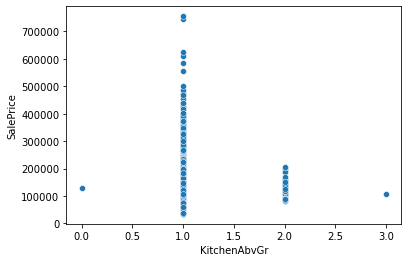

The median of :- 1.0
The mean of :- 1.0453767123287672


In [307]:
feature_details('KitchenAbvGr')

TotRmsAbvGrd  has total unique values =  12 out of  1168
Feature datatype is =  int64
Feature has  0 missing values


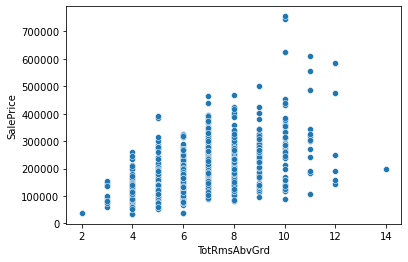

The median of :- 6.0
The mean of :- 6.542808219178082


In [308]:
feature_details('TotRmsAbvGrd')

Fireplaces  has total unique values =  4 out of  1168
[1 0 2 3]
Feature datatype is =  int64
Feature has  0 missing values


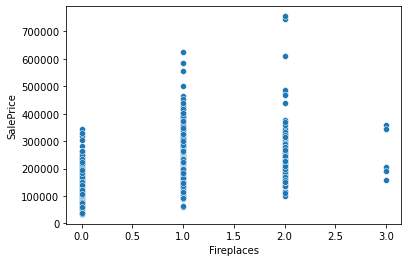

The median of :- 1.0
The mean of :- 0.6172945205479452


In [309]:
feature_details('Fireplaces')

GarageCars  has total unique values =  5 out of  1168
[2 3 1 0 4]
Feature datatype is =  int64
Feature has  0 missing values


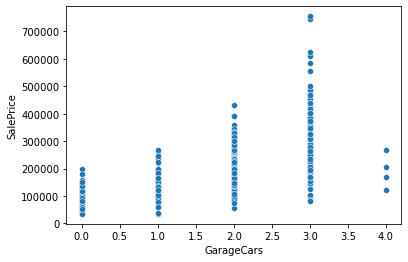

The median of :- 2.0
The mean of :- 1.7765410958904109


In [310]:
feature_details('GarageCars')

GarageArea  has total unique values =  392 out of  1168
Feature datatype is =  int64
Feature has  0 missing values


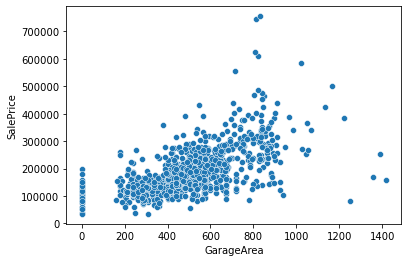

The median of :- 480.0
The mean of :- 476.86044520547944


In [311]:
feature_details('GarageArea')

WoodDeckSF  has total unique values =  244 out of  1168
Feature datatype is =  int64
Feature has  0 missing values


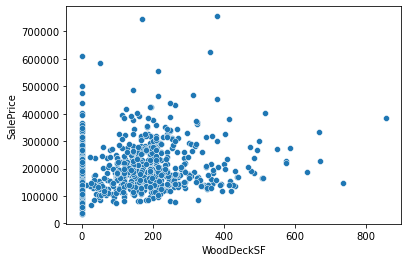

The median of :- 0.0
The mean of :- 96.20633561643835


In [312]:
feature_details('WoodDeckSF')

OpenPorchSF  has total unique values =  176 out of  1168
Feature datatype is =  int64
Feature has  0 missing values


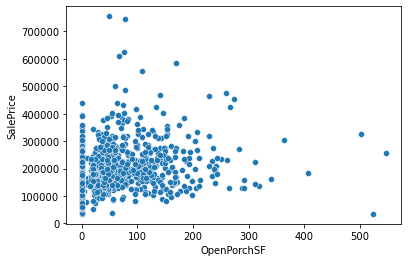

The median of :- 24.0
The mean of :- 46.55993150684932


In [313]:
feature_details('OpenPorchSF')

EnclosedPorch  has total unique values =  106 out of  1168
Feature datatype is =  int64
Feature has  0 missing values


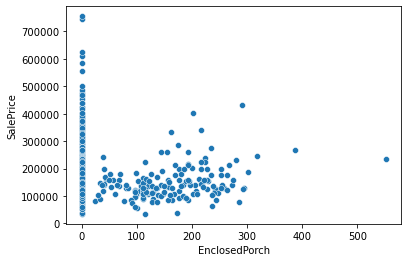

The median of :- 0.0
The mean of :- 23.01541095890411


In [314]:
feature_details('EnclosedPorch')

3SsnPorch  has total unique values =  18 out of  1168
Feature datatype is =  int64
Feature has  0 missing values


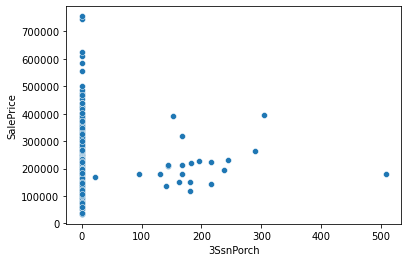

The median of :- 0.0
The mean of :- 3.639554794520548


In [315]:
feature_details('3SsnPorch')

ScreenPorch  has total unique values =  65 out of  1168
Feature datatype is =  int64
Feature has  0 missing values


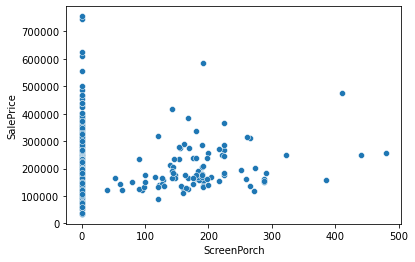

The median of :- 0.0
The mean of :- 15.051369863013699


In [316]:
feature_details('ScreenPorch')

PoolArea  has total unique values =  8 out of  1168
[  0 555 576 738 519 480 648 512]
Feature datatype is =  int64
Feature has  0 missing values


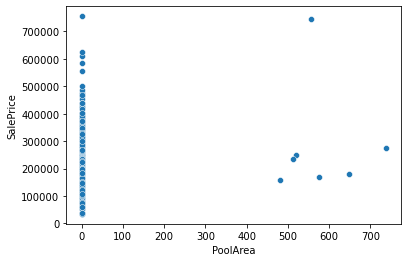

The median of :- 0.0
The mean of :- 3.4486301369863015


In [317]:
feature_details('PoolArea')

MiscVal  has total unique values =  20 out of  1168
Feature datatype is =  int64
Feature has  0 missing values


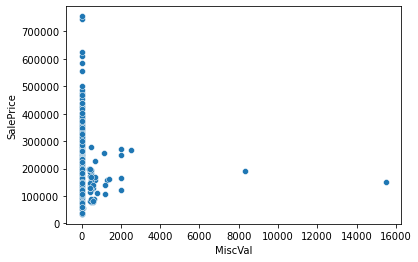

The median of :- 0.0
The mean of :- 47.31506849315068


In [318]:
feature_details('MiscVal')

MoSold  has total unique values =  12 out of  1168
Feature datatype is =  int64
Feature has  0 missing values


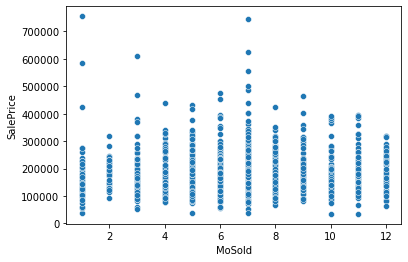

The median of :- 6.0
The mean of :- 6.344178082191781


In [319]:
feature_details('MoSold')

YrSold  has total unique values =  5 out of  1168
[2007 2010 2009 2006 2008]
Feature datatype is =  int64
Feature has  0 missing values


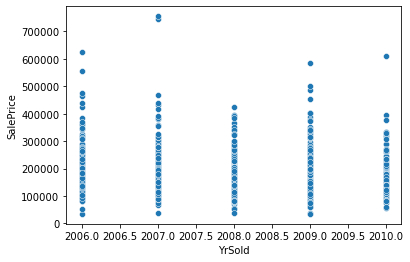

The median of :- 2008.0
The mean of :- 2007.804794520548


In [320]:
feature_details('YrSold')

# Filling null values

In [321]:
df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
Street             0
LotShape           0
LandContour        0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         7
MasVnrArea         7
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          30
BsmtCond          30
BsmtExposure      31
BsmtFinType1      30
BsmtFinType2      31
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        0
TotRmsAbvGrd 

In [341]:
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].median())

In [322]:
categorical=[x for x in cate if df[x].isnull().sum()>0]

for i in cat_null:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [323]:
df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
Street             0
LotShape           0
LandContour        0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         7
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinType2       0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        0
TotRmsAbvGrd 

In [324]:
continous=[x for x in conti if df[x].isnull().sum()>0]

for i in cont_null:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [325]:
df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
Street             0
LotShape           0
LandContour        0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinType2       0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        0
TotRmsAbvGrd 

<AxesSubplot:>

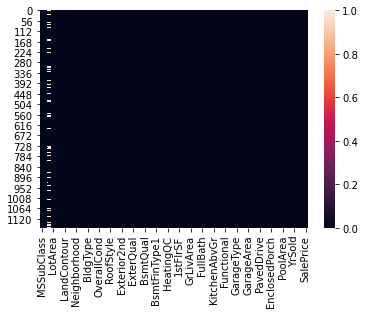

In [326]:
sb.heatmap(df.isnull())

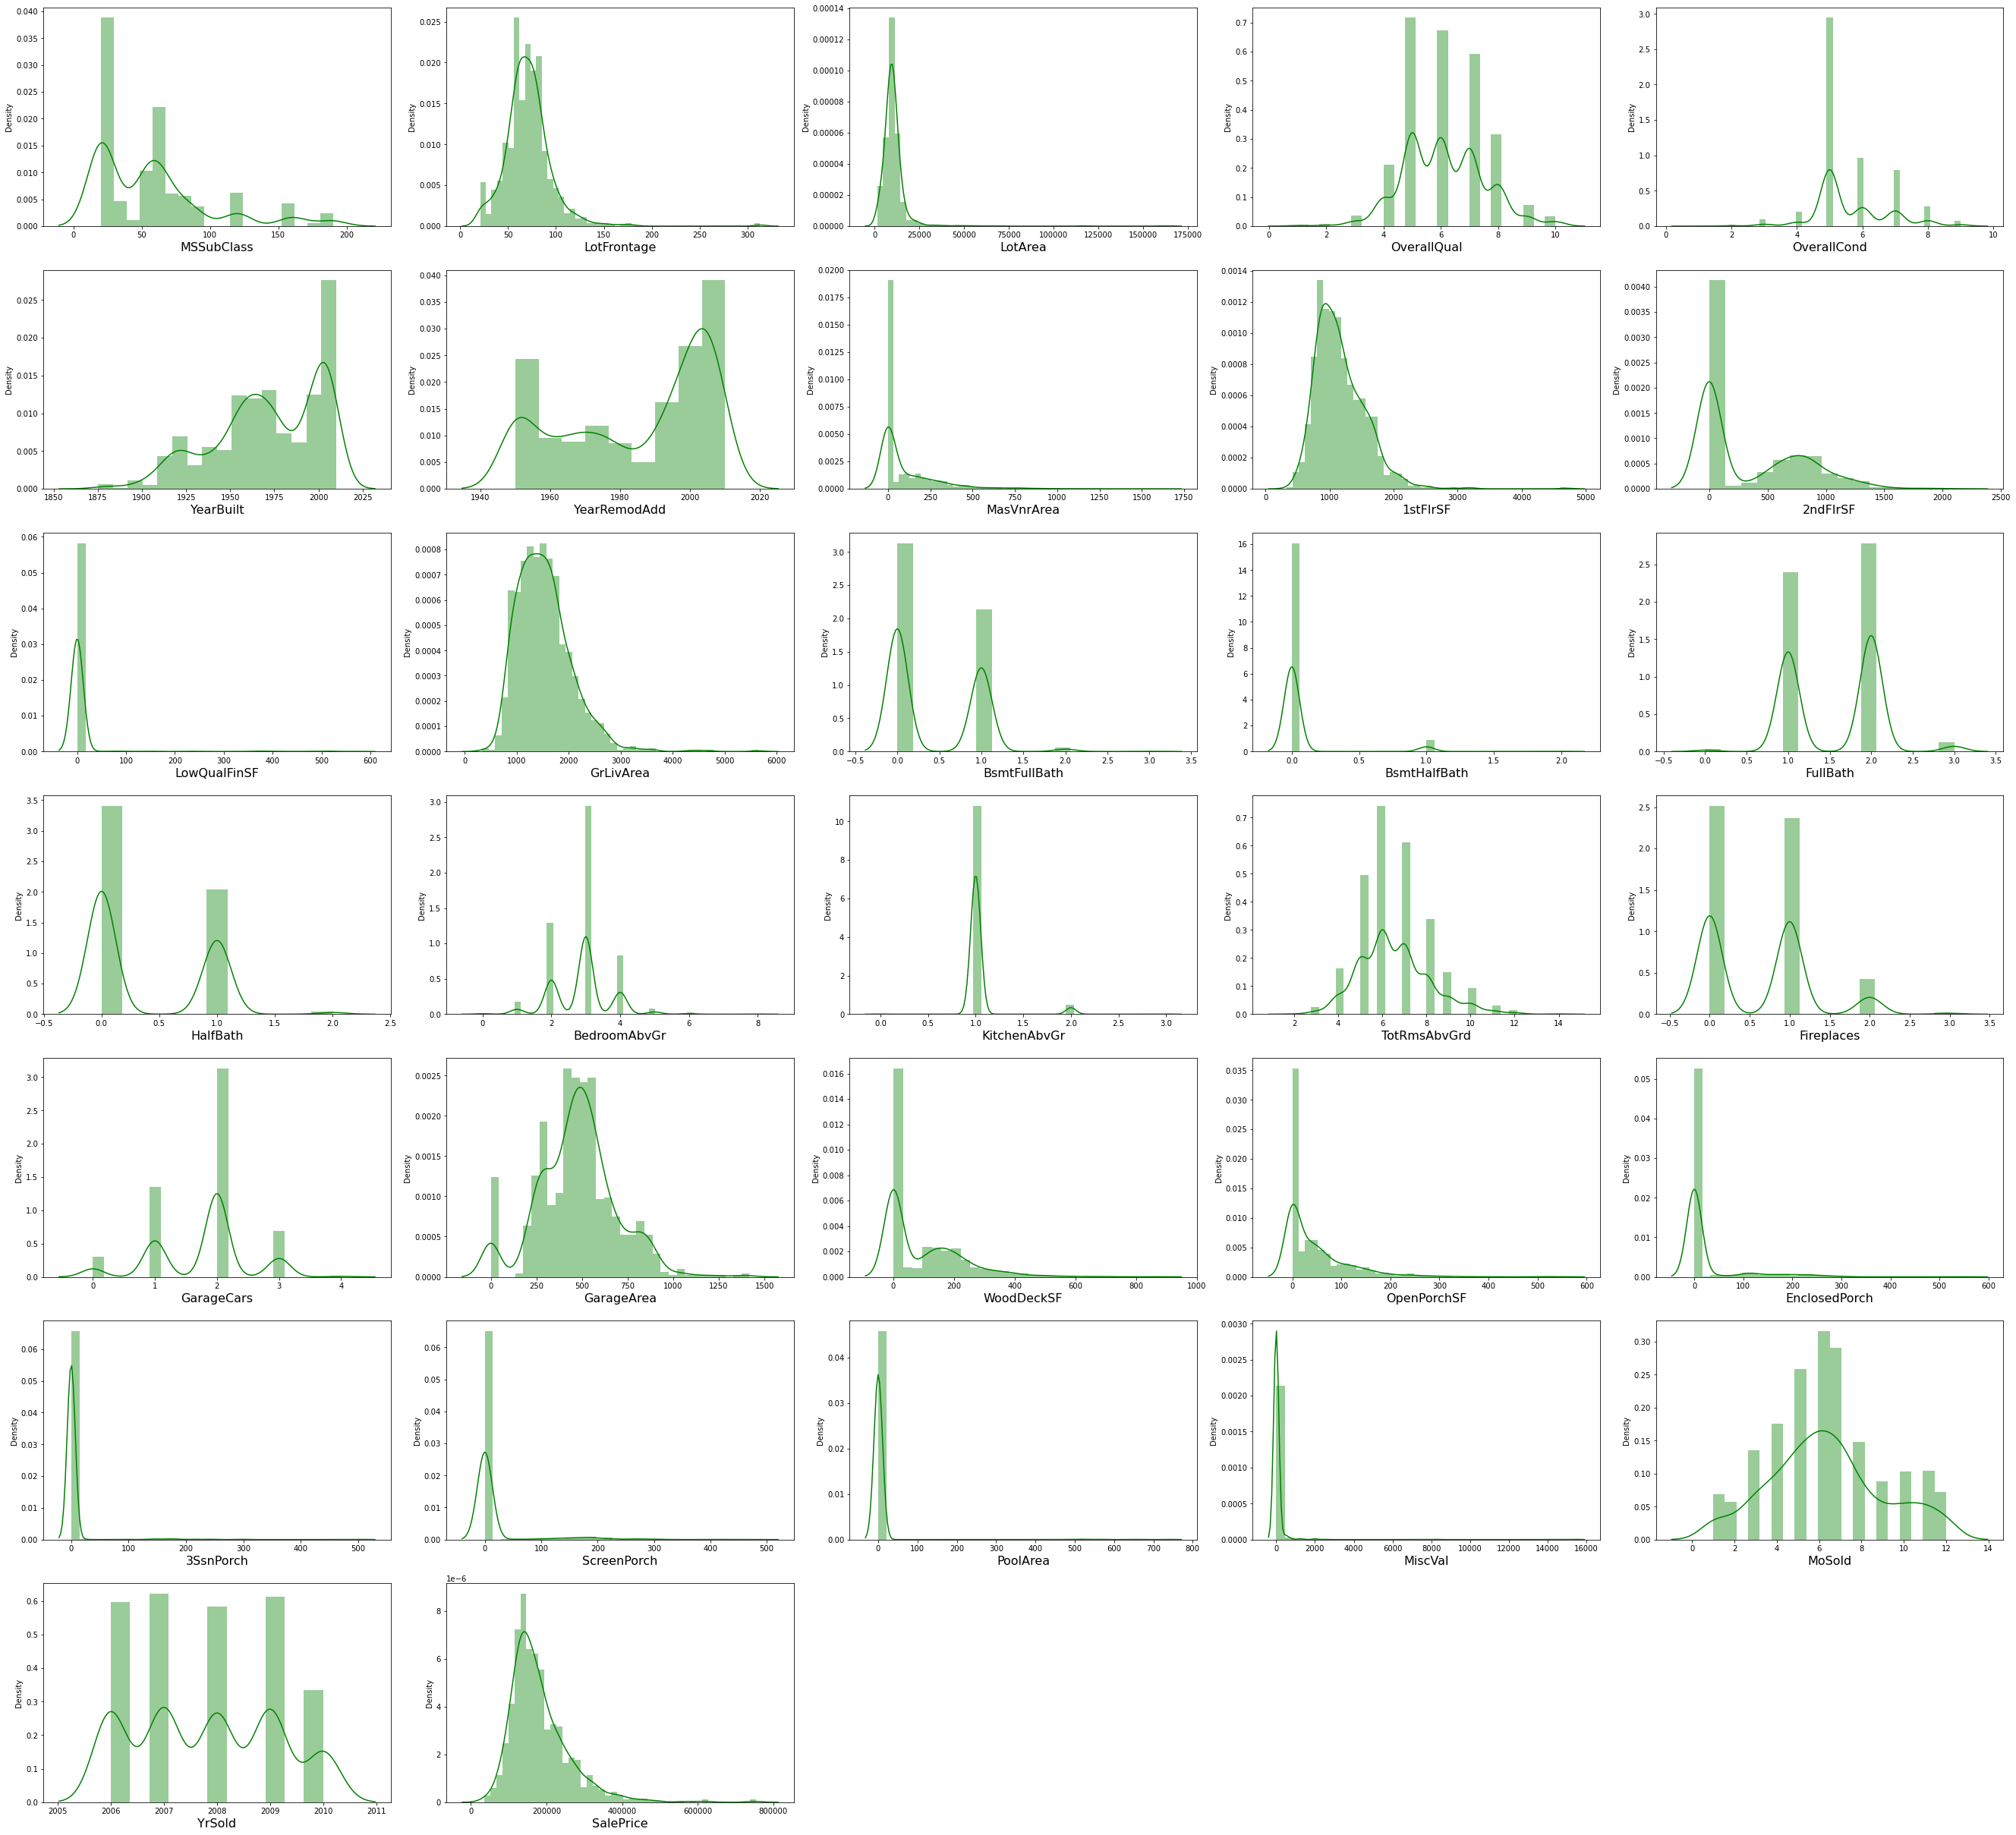

In [327]:
plt.figure(figsize=(37,38))
num=1

for columns in conti:
    
    if num<=40:
        ax=plt.subplot(8,5,num)
        sb.distplot(conti[columns],color='g')
        plt.xlabel(columns,fontsize=16)
        
    num+=1
plt.tight_layout()

value are skewed, not all but lots of columns 

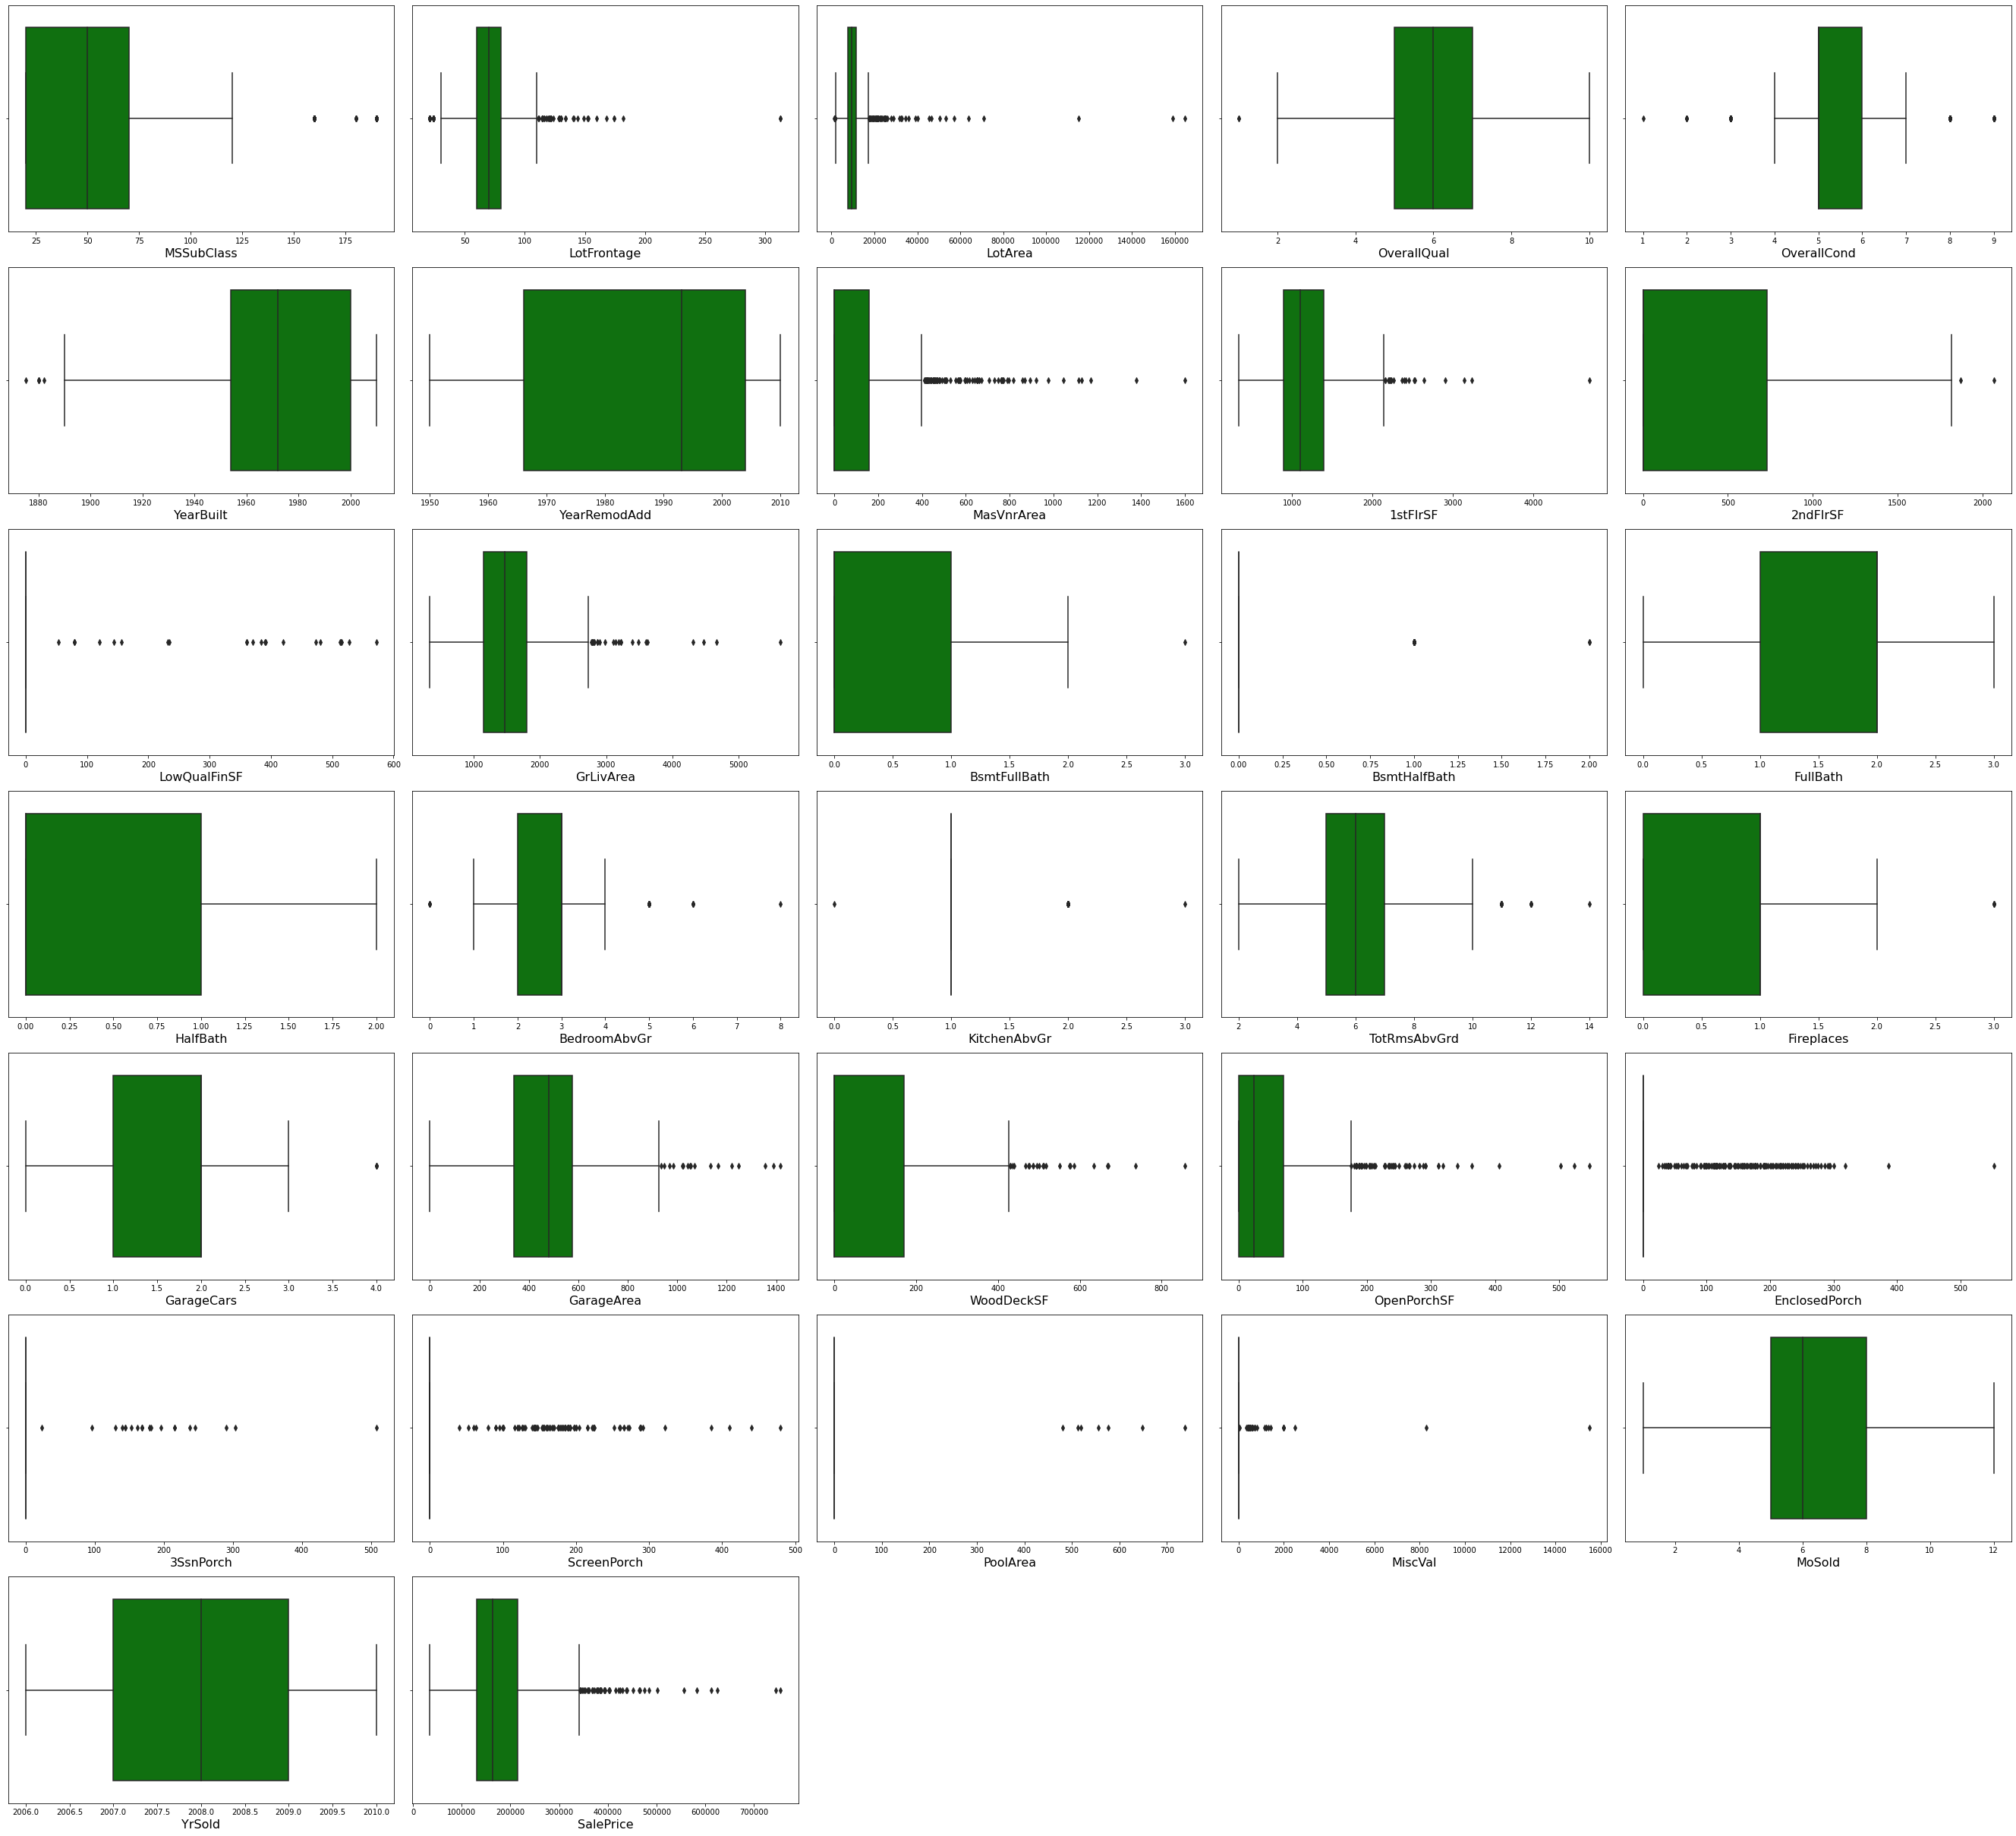

In [329]:
plt.figure(figsize=(37,38))
num=1

for columns in conti:
    
    if num<=40:
        ax=plt.subplot(8,5,num)
        sb.boxplot(conti[columns],color='g')
        plt.xlabel(columns,fontsize=16)
        
    num+=1
plt.tight_layout()

outliers are present in here, we neeed to clean it.

In [9]:
outliers=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt',  'MasVnrArea', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 
         'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
        'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
        'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
         'SalePrice']

In [10]:
df[outliers].skew()

MSSubClass        1.422019
LotFrontage       2.450241
LotArea          10.659285
OverallQual       0.175082
OverallCond       0.580714
YearBuilt        -0.579204
MasVnrArea        2.826173
1stFlrSF          1.513707
2ndFlrSF          0.823479
LowQualFinSF      8.666142
GrLivArea         1.449952
BsmtFullBath      0.627106
BsmtHalfBath      4.264403
BedroomAbvGr      0.243855
KitchenAbvGr      4.365259
TotRmsAbvGrd      0.644657
Fireplaces        0.671966
GarageCars       -0.358556
GarageArea        0.189665
WoodDeckSF        1.504929
OpenPorchSF       2.410840
EnclosedPorch     3.043610
3SsnPorch         9.770611
ScreenPorch       4.105741
PoolArea         13.243711
MiscVal          23.065943
SalePrice         1.953878
dtype: float64

## Feature Engineering 

In [367]:
for i in cate:
    print(i)
    print(df[i].unique())
    print('*' * 50)

MSZoning
['RL' 'RM' 'FV' 'RH' 'C (all)']
**************************************************
Street
['Pave' 'Grvl']
**************************************************
LotShape
['IR1' 'Reg' 'IR2' 'IR3']
**************************************************
LandContour
['Lvl' 'Bnk' 'HLS' 'Low']
**************************************************
LotConfig
['Inside' 'CulDSac' 'FR2' 'Corner' 'FR3']
**************************************************
LandSlope
['Gtl' 'Mod' 'Sev']
**************************************************
Neighborhood
['NPkVill' 'NAmes' 'NoRidge' 'NWAmes' 'Gilbert' 'Sawyer' 'Edwards'
 'IDOTRR' 'CollgCr' 'Mitchel' 'Crawfor' 'BrDale' 'StoneBr' 'BrkSide'
 'NridgHt' 'OldTown' 'Somerst' 'Timber' 'SWISU' 'SawyerW' 'ClearCr'
 'Veenker' 'Blmngtn' 'MeadowV' 'Blueste']
**************************************************
Condition1
['Norm' 'Feedr' 'RRAn' 'PosA' 'RRAe' 'Artery' 'PosN' 'RRNe' 'RRNn']
**************************************************
Condition2
['Norm' 'RRAe' 'Feedr' '

In [362]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [365]:
len(cate.columns)

38

In [368]:
for i in cate.columns:
    cate[i]=le.fit_transform(cate[i])

In [371]:
len(cate.columns)

38

Now, we see the correlation 

In [373]:
df1=pd.concat([conti,cate],join='inner',axis=1)


In [375]:
df1.shape

(1168, 70)

# correlation 

In [377]:
df1.corr()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.365220 -0.124151     0.070462    -0.056978   
LotFrontage     -0.365220     1.000000  0.557257     0.247809    -0.053345   
LotArea         -0.124151     0.557257  1.000000     0.107188     0.017513   
OverallQual      0.070462     0.247809  0.107188     1.000000    -0.083167   
OverallCond     -0.056978    -0.053345  0.017513    -0.083167     1.000000   
YearBuilt        0.023988     0.118554  0.005506     0.575800    -0.377731   
YearRemodAdd     0.056618     0.096050  0.027228     0.555945     0.080669   
MasVnrArea       0.027868     0.202225  0.121448     0.409163    -0.137882   
1stFlrSF        -0.227927     0.448186  0.312843     0.458758    -0.134420   
2ndFlrSF         0.300366     0.099250  0.059803     0.316624     0.036668   
LowQualFinSF     0.053737     0.007885 -0.001915    -0.039295     0.041877   
GrLivArea        0.086448     0.410414  0.281360     0.599700    -0.065006   
BsmtFullBath     0.004556     0.104255  0.142387     0.101732    -0.039680   
BsmtHalfBath     0.008207     0.001528  0.059282    -0.030702     0.091016   
FullBath         0.140807     0.189321  0.123197     0.548824    -0.171931   
HalfBath         0.168423     0.053168  0.007271     0.296134    -0.052125   
BedroomAbvGr    -0.013283     0.264010  0.117351     0.099639     0.028393   
KitchenAbvGr     0.283506    -0.002890 -0.013075    -0.178220    -0.076047   
TotRmsAbvGrd     0.051179     0.351969  0.184546     0.432579    -0.039952   
Fireplaces      -0.035792     0.262076  0.285983     0.390067    -0.013632   
GarageCars      -0.027639     0.276798  0.158313     0.596322    -0.161996   
GarageArea      -0.092408     0.344908  0.195162     0.566782    -0.126021   
WoodDeckSF      -0.022609     0.101751  0.216720     0.227137     0.012290   
OpenPorchSF      0.017468     0.167092  0.093080     0.341030    -0.024899   
EnclosedPorch   -0.004252     0.023118 -0.007446    -0.098374     0.056074   
3SsnPorch       -0.043210     0.059508  0.025794     0.045919     0.040476   
ScreenPorch     -0.013291     0.033111  0.025256     0.059387     0.069463   
PoolArea         0.009583     0.223429  0.097107     0.072247    -0.003603   
MiscVal         -0.023503    -0.004559  0.051679    -0.025786     0.075178   
MoSold          -0.016015     0.025046  0.015141     0.090638     0.005519   
YrSold          -0.038595    -0.004296 -0.035399    -0.048759     0.055517   
SalePrice       -0.060775     0.341294  0.249499     0.789185    -0.065642   
MSZoning         0.007478    -0.073020 -0.023328    -0.134037     0.189553   
Street          -0.035981    -0.040766 -0.263973     0.057140     0.031082   
LotShape         0.104485    -0.169656 -0.189201    -0.189636     0.026931   
LandContour     -0.021387    -0.079216 -0.159038     0.045643    -0.038304   
LotConfig        0.076880    -0.221694 -0.152063    -0.031717    -0.027364   
LandSlope       -0.014930     0.061053  0.395410    -0.084261     0.019606   
Neighborhood     0.013918     0.072719  0.010707     0.184320    -0.040615   
Condition1      -0.042474    -0.028392  0.029520     0.118819    -0.016300   
Condition2      -0.044319     0.014500  0.040096     0.045038     0.011670   
BldgType         0.731815    -0.440994 -0.215345     0.078782    -0.172525   
HouseStyle       0.381585     0.062713 -0.040637     0.252154    -0.021833   
RoofStyle       -0.100641     0.163502  0.038615     0.145048    -0.002809   
RoofMatl        -0.032214     0.097882  0.194142     0.093442     0.038904   
Exterior1st     -0.090178     0.096368  0.048265     0.164492    -0.051630   
Exterior2nd     -0.120022     0.121037  0.027328     0.148603    -0.032502   
MasVnrType      -0.015161    -0.033961 -0.000632     0.004847    -0.001562   
ExterQual       -0.024133    -0.184022 -0.057865    -0.630802     0.168404   
ExterCond        0.004186     0.049376  0.011438     0.137056    -0.186032   
Foundation       0.053951     0.09738

<AxesSubplot:>

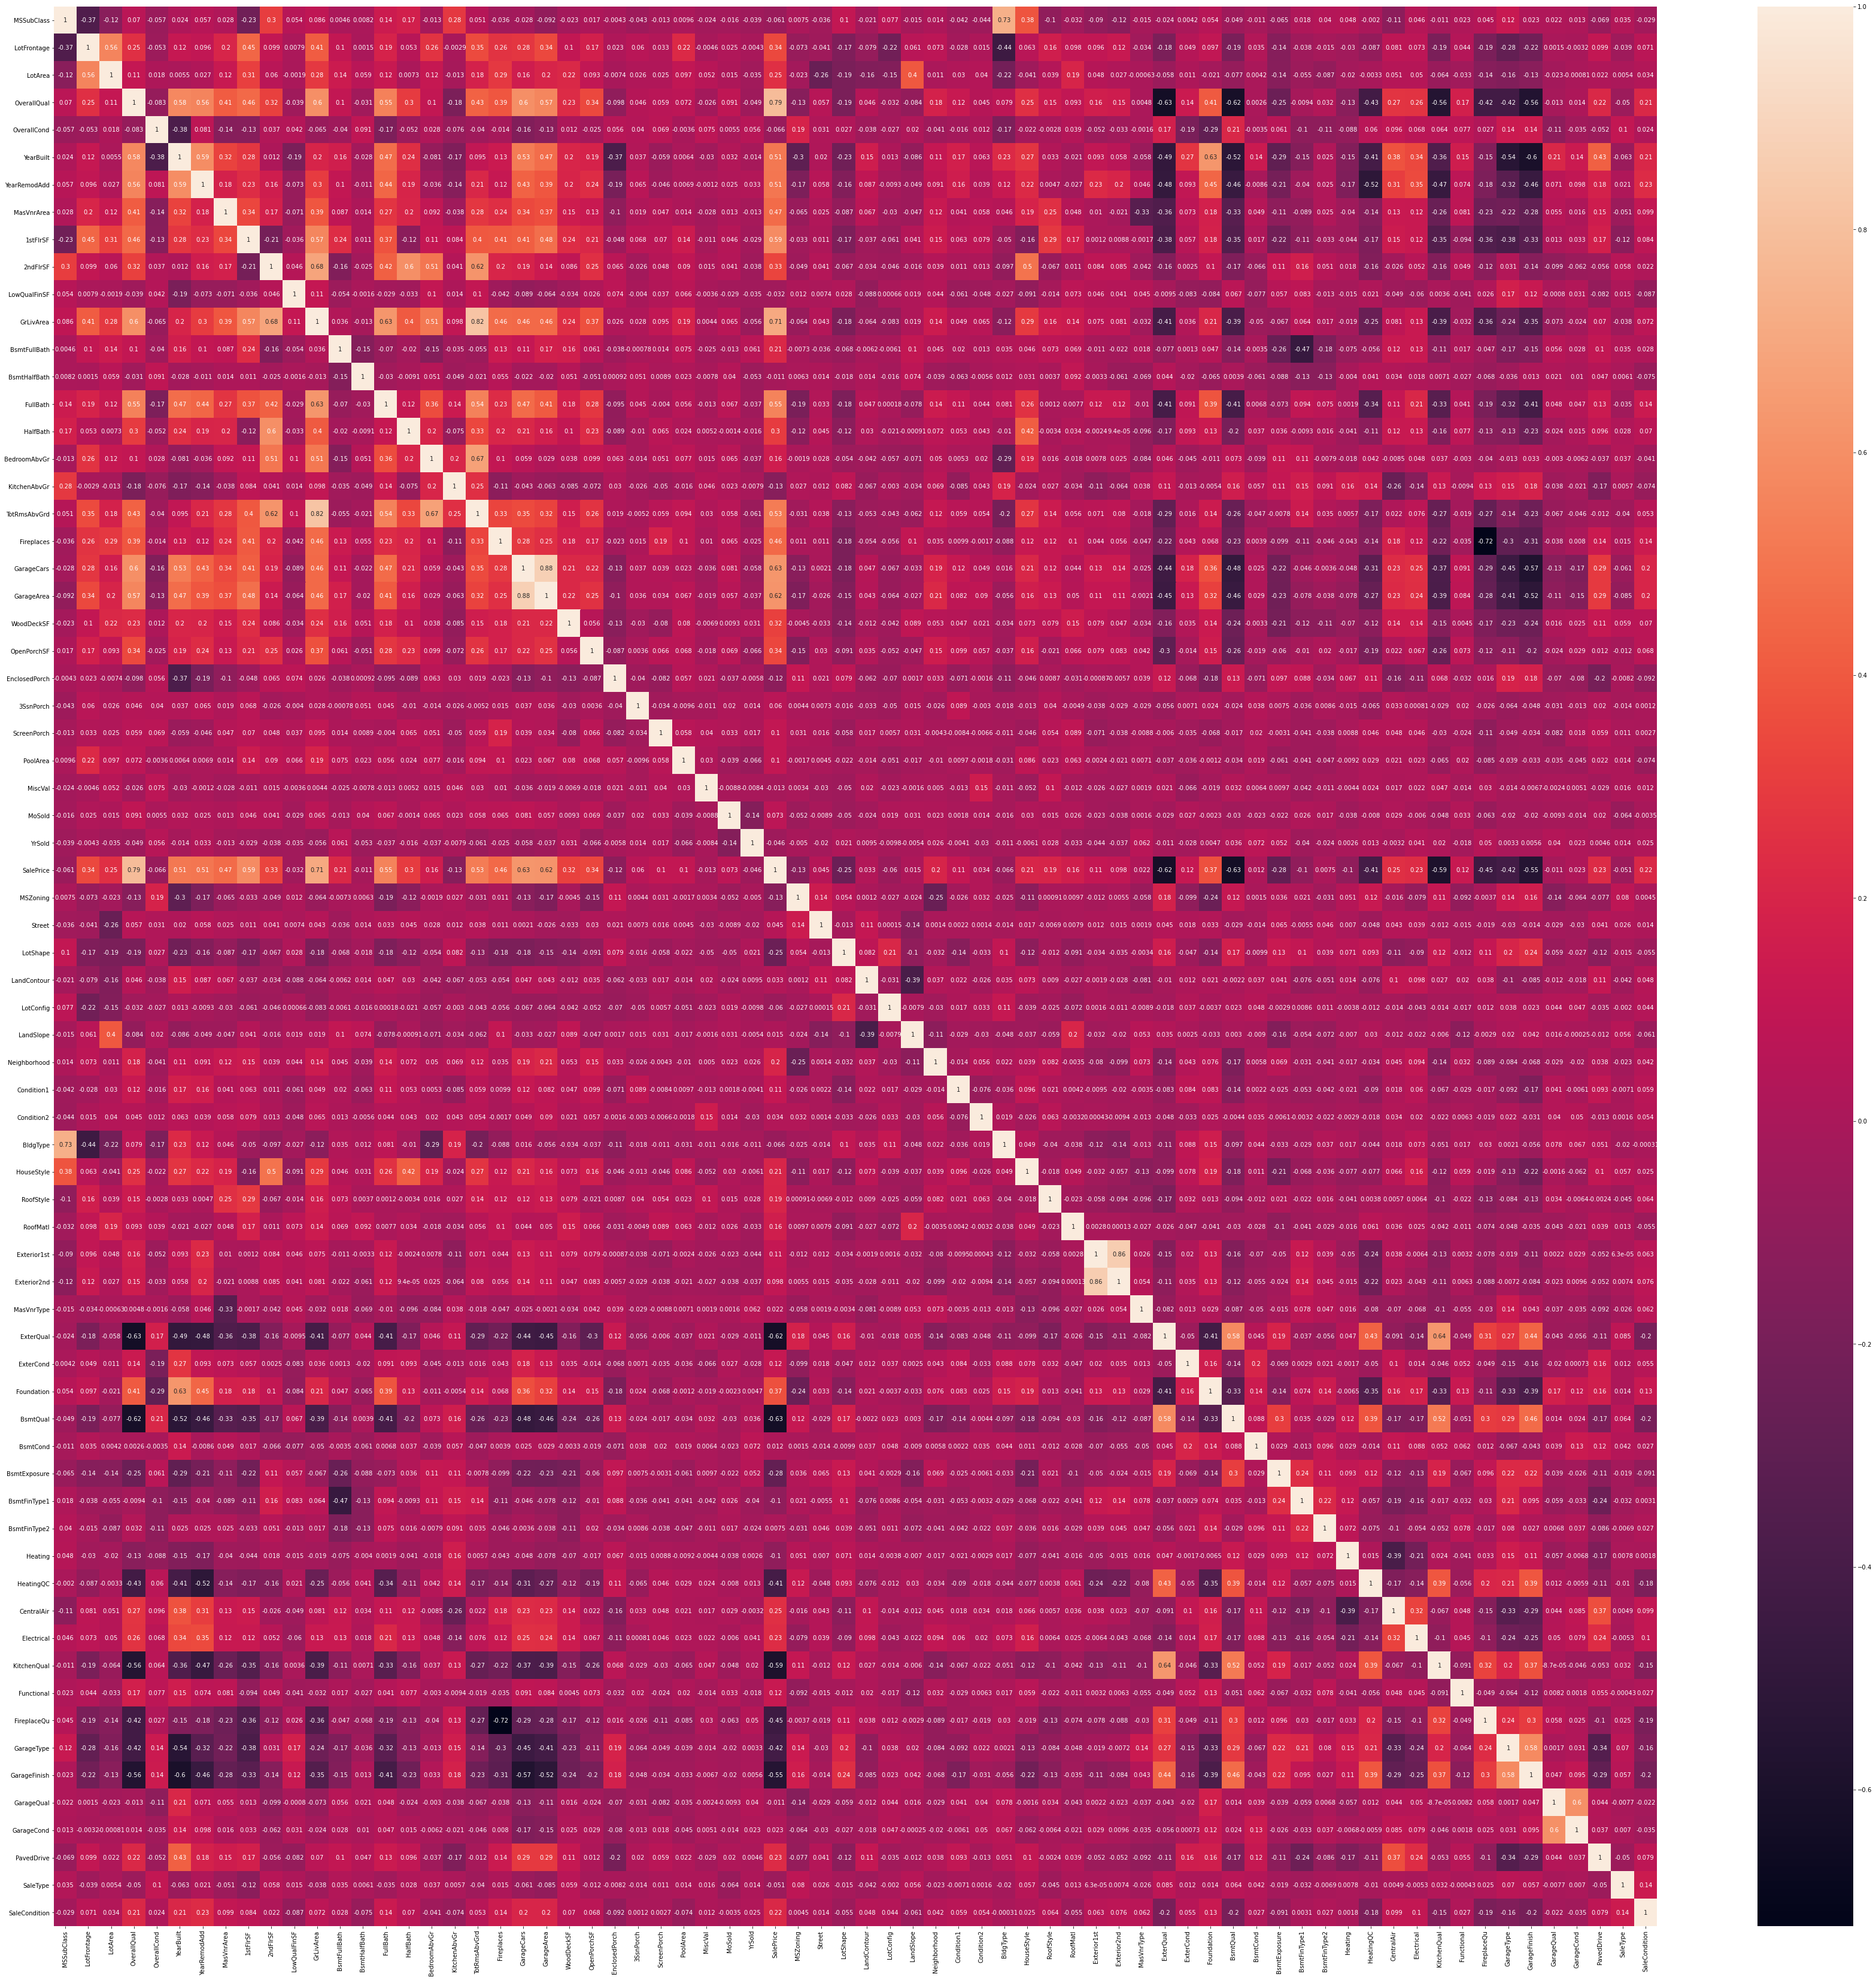

In [381]:
plt.figure(figsize=(60,59))
sb.heatmap(df1.corr(),annot=True)

for my point of view there is no myulticolinierity problem

In [382]:
df1.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'MSZoning', 'Street', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQ

# Removing outliers

In [383]:
from scipy.stats import zscore

In [384]:
z=np.abs(zscore(conti))

In [388]:
r=np.where(z>3)[0]

In [387]:
len(np.where(z>3)[0])


456

In [390]:
df1.drop(index=r,axis=0,inplace=True)

In [392]:
df1.reset_index()

index  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        0         120          NaN     4928            6            5   
1        2          60         92.0     9920            7            5   
2        3          20        105.0    11751            6            6   
3        5          60         58.0    14054            7            5   
4        6          20          NaN    11341            5            6   
5        7          20         88.0    13125            5            4   
6        8          20         70.0     9170            5            7   
7        9          50         80.0     8480            5            5   
8       10          50         50.0     8600            6            6   
9       11          60         44.0     9548            7            6   
10      12          20        129.0     9196            7            5   
11      13          20         80.0     8892            5            5   
12      15          70         55.0    10592            6            7   
13      16          30          NaN     5890            6            8   
14      17          20         64.0     7314            7            5   
15      18          20          NaN     7917            6            7   
16      19         160         24.0     2016            5            5   
17      21          85         70.0     8445            5            7   
18      22          20         68.0     9717            5            6   
19      24          20         71.0     9230            5            8   
20      25          20          NaN    21000            6            5   
21      26          30          NaN    25339            5            7   
22      28          45         58.0     6380            5            6   
23      29          70         74.0    11988            6            7   
24      30         120         61.0     7658            9            5   
25      31          60         60.0     3378            7            8   
26      34          60          NaN    14762            5            6   
27      35          20        120.0    10356            5            6   
28      36          20         80.0    10400            7            5   
29      37          20         84.0    12615            6            7   
30      39          40         50.0     9100            5            6   
31      40          20        141.0    31770            6            5   
32      41          20         70.0    13300            5            7   
33      42         160         30.0     3180            7            5   
34      43         160         24.0     2522            6            5   
35      44          80         65.0     8385            5            8   
36      45          20         76.0     8314            5            7   
37      46          60         60.0     8123            6            5   
38      47          20        100.0    12000            5            7   
39      49          20         70.0     7931            5            6   
40      50          20         85.0    14331            8            5   
41      52          30         60.0     8400            2            5   
42      53          20         64.0     8712            5            7   
43      54          20         60.0    11100            4            7   
44      55          20         75.0     9742            8            5   
45      56          20          NaN    19900            7            5   
46      57          60        107.0    10186            7            5   
47      58          30         50.0     8765            4            6   
48      59          20        122.0    11923            9            5   
49      60          20         60.0     7200            5            7   
50      61          85         68.0     7838            5            5   
51      62          20         60.0     7024            4            5   
52      65          60         74.0     8834            9            5   
53      6

In [393]:
df1.shape

(851, 70)

In [ ]:
df1.

In [397]:
df1[continous].skew()

MSSubClass        1.406032
LotFrontage       1.996108
LotArea           0.895236
OverallQual       0.019270
OverallCond       0.726278
YearBuilt        -0.595060
YearRemodAdd     -0.597080
MasVnrArea        2.550935
1stFlrSF          0.709194
2ndFlrSF          0.744674
LowQualFinSF     15.963095
GrLivArea         0.559138
BsmtFullBath      0.341525
BsmtHalfBath      0.000000
FullBath         -0.009559
HalfBath          0.471643
BedroomAbvGr     -0.153855
KitchenAbvGr      0.000000
TotRmsAbvGrd      0.368466
Fireplaces        0.565197
GarageCars       -0.341292
GarageArea       -0.020654
WoodDeckSF        0.939054
OpenPorchSF       1.406947
EnclosedPorch     2.896412
3SsnPorch        29.171904
ScreenPorch       4.681751
PoolArea          0.000000
MiscVal           8.348298
MoSold            0.269507
YrSold            0.105258
SalePrice         0.891706
dtype: float64

In [401]:
df1.drop(columns=['LowQualFinSF','3SsnPorch','MiscVal','ScreenPorch','MasVnrArea'],axis=1,inplace=True)

In [403]:
df1.head()
df1.reset_index(inplace=True)

In [404]:
df1.shape

(851, 66)

In [405]:
df1.drop('index',axis=1,inplace=True)

In [406]:
df1.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0         120          NaN     4928            6            5       1976   
1          60         92.0     9920            7            5       1996   
2          20        105.0    11751            6            6       1977   
3          60         58.0    14054            7            5       2006   
4          20          NaN    11341            5            6       1957   

   YearRemodAdd  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0          1976       958         0        958             0             0   
1          1997      1127       886       2013             1             0   
2          1977      1844         0       1844             0             0   
3          2006       879       984       1863             0             0   
4          1996      1392         0       1392             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         0             2             1             5           1   
1         2         1             3             1             8           1   
2         2         0             3             1             7           1   
3         2         1             4             1             9           1   
4         1         1             3             1             5           1   

   GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  PoolArea  \
0           2         440           0          205              0         0   
1           2         455         180          130              0         0   
2           2         546           0          122              0         0   
3           3         660         100           17              0         0   
4           2         528           0            0              0         0   

   MoSold  YrSold  SalePrice  MSZoning  Street  LotShape  LandContour  \
0       2    2007     128000         3       1         0            3   
1       6    2007     269790         3       1         0            3   
2       1    2010     190000         3       1         0            3   
3      11    2006     219210         3       1         0            3   
4       5    2010     121500         3       1         0            3   

   LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  \
0          4          0            13           2           2         4   
1          1          0            15           2           2         0   
2          4          0            14           2           2         0   
3          4          0             8           2           2         0   
4          4          0            19           2           2         0   

   HouseStyle  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0           2          1         1            8            9           2   
1           5          1         1            7            7           2   
2           2          3         1            8            9           1   
3           5          1         1           11           12           2   
4           2          3         1           12           13           1   

   ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  \
0          3          4           1         2         3             3   
1          2          4           2         2         3             0   
2          3          4           1         2         3             3   
3          2          4           2         2         3             0   
4          3          4           1         2         3             3   

   BsmtFinType1  BsmtFinType2  Heating  HeatingQC  CentralAir  Electrical  \
0             0             5        1          4           1           4   
1             2             5        1          0           1           4   
2             1             5        1          0           1           4   
3             5             5    

In [450]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851 entries, 0 to 850
Data columns (total 65 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     851 non-null    int64  
 1   LotFrontage    851 non-null    float64
 2   LotArea        851 non-null    int64  
 3   OverallQual    851 non-null    int64  
 4   OverallCond    851 non-null    int64  
 5   YearBuilt      851 non-null    int64  
 6   YearRemodAdd   851 non-null    int64  
 7   1stFlrSF       851 non-null    int64  
 8   2ndFlrSF       851 non-null    int64  
 9   GrLivArea      851 non-null    int64  
 10  BsmtFullBath   851 non-null    int64  
 11  BsmtHalfBath   851 non-null    int64  
 12  FullBath       851 non-null    int64  
 13  HalfBath       851 non-null    int64  
 14  BedroomAbvGr   851 non-null    int64  
 15  KitchenAbvGr   851 non-null    int64  
 16  TotRmsAbvGrd   851 non-null    int64  
 17  Fireplaces     851 non-null    int64  
 18  GarageCars

In [455]:
X=df1.drop('SalePrice',axis=1)
Y=df1['SalePrice']

# Checking VIF

In [461]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = np.round([variance_inflation_factor(X.values, i) 
                   for i in range(len(X.columns))])
vif_data.sort_values(by='VIF',ascending=False)

feature        VIF
15   KitchenAbvGr  2476141.0
9       GrLivArea     4070.0
8        2ndFlrSF     3584.0
7        1stFlrSF     2379.0
0      MSSubClass       14.0
35       BldgType       11.0
5       YearBuilt        8.0
18     GarageCars        6.0
40    Exterior2nd        5.0
39    Exterior1st        5.0
19     GarageArea        5.0
16   TotRmsAbvGrd        5.0
3     OverallQual        4.0
12       FullBath        4.0
17     Fireplaces        3.0
36     HouseStyle        3.0
14   BedroomAbvGr        3.0
13       HalfBath        3.0
6    YearRemodAdd        3.0
42      ExterQual        3.0
56    FireplaceQu        3.0
54    KitchenQual        2.0
47   BsmtExposure        2.0
48   BsmtFinType1        2.0
51      HeatingQC        2.0
52     CentralAir        2.0
60     GarageCond        2.0
57     GarageType        2.0
58   GarageFinish        2.0
59     GarageQual        2.0
44     Foundation        2.0
61     PavedDrive        2.0
10   BsmtFullBath        2.0
4     OverallCond        2.0
2         LotArea        2.0
45       BsmtQual        2.0
55     Functional        1.0
53     Electrical        1.0
50        Heating        1.0
49   BsmtFinType2        1.0
62       SaleType        1.0
46       BsmtCond        1.0
33     Condition1        1.0
43      ExterCond        1.0
28       LotShape        1.0
20     WoodDeckSF        1.0
21    OpenPorchSF        1.0
22  EnclosedPorch        1.0
24         MoSold        1.0
25         YrSold        1.0
26       MSZoning        1.0
27         Street        1.0
29    LandContour        1.0
41     MasVnrType        1.0
30      LotConfig        1.0
31      LandSlope        1.0
32   Neighborhood        1.0
1     LotFrontage        1.0
34     Condition2        1.0
37      RoofStyle        1.0
38       RoofMatl        1.0
63  SaleCondition        1.0
11   BsmtHalfBath        NaN
23       PoolArea        NaN

# Feature Selection:-

In [456]:
from sklearn.tree import DecisionTreeClassifier
select= DecisionTreeClassifier()
select.fit(X,Y)

DecisionTreeClassifier()

In [457]:
add=np.round(select.feature_importances_,3)
add

array([0.015, 0.039, 0.053, 0.013, 0.017, 0.043, 0.036, 0.034, 0.018,
       0.057, 0.018, 0.   , 0.004, 0.008, 0.009, 0.   , 0.029, 0.012,
       0.01 , 0.055, 0.031, 0.032, 0.005, 0.   , 0.044, 0.032, 0.012,
       0.   , 0.011, 0.002, 0.016, 0.   , 0.032, 0.006, 0.   , 0.006,
       0.012, 0.009, 0.004, 0.026, 0.019, 0.02 , 0.009, 0.008, 0.009,
       0.01 , 0.009, 0.012, 0.031, 0.008, 0.001, 0.015, 0.   , 0.003,
       0.009, 0.008, 0.018, 0.01 , 0.02 , 0.004, 0.005, 0.004, 0.009,
       0.009])

In [460]:
0.015+ 0.039+ 0.053+ 0.013+ 0.017+ 0.043+ 0.036+ 0.034+ 0.018+0.057+ 0.018+ 0.   + 0.004+ 0.008+ 0.009+ 0.   + 0.029+ 0.012+0.01 + 0.055+ 0.031+ 0.032+ 0.005+ 0.   + 0.044+ 0.032+ 0.012+0.   + 0.011+ 0.002+ 0.016+ 0.   + 0.032+ 0.006+ 0.   + 0.006+0.012+ 0.009+ 0.004+ 0.026+ 0.019+ 0.02 + 0.009+ 0.008+ 0.009+0.01 + 0.009+ 0.012+ 0.031+ 0.008+ 0.001+ 0.015+ 0.   + 0.003+0.009+ 0.008+ 0.018+ 0.01 + 0.02 + 0.004+ 0.005+ 0.004+ 0.009+0.009

1.0000000000000004

In [ ]:
not dropping any more columns 

In [458]:
for index,feature_imp in enumerate(select.feature_importances_):
    print(index , feature_imp)

0 0.014742077735616864
1 0.039436808822404905
2 0.053074268384468694
3 0.013058459689026802
4 0.01661475725581427
5 0.043327427336554813
6 0.03600614654490305
7 0.033655718347378946
8 0.01757872067662198
9 0.05738634046460663
10 0.01766802916428596
11 0.0
12 0.003649647178133783
13 0.008255563531945443
14 0.008648685604895226
15 0.0
16 0.029484155471233724
17 0.01179366218849349
18 0.009975472601100743
19 0.05469263635905781
20 0.030723152930348527
21 0.03178701381815479
22 0.004717464875397396
23 0.0
24 0.04378904421647917
25 0.03226252322628618
26 0.011631150538634116
27 0.0
28 0.011092531792837835
29 0.002358732437698698
30 0.016314566027415996
31 0.0
32 0.03214145697258426
33 0.005896831094246745
34 0.0
35 0.0055037090212969614
36 0.012344726020246489
37 0.009434929750794793
38 0.003539319532551011
39 0.02552819338516956
40 0.018988028096668965
41 0.02030194705304951
42 0.009399555796824529
43 0.008255563531945443
44 0.009434929750794793
45 0.009988011839634487
46 0.008663953452887

In [459]:
imp_feature=pd.DataFrame()
imp_feature['Feature']= X.columns
imp_feature['Values']=select.feature_importances_
imp_feature

Feature    Values
0      MSSubClass  0.014742
1     LotFrontage  0.039437
2         LotArea  0.053074
3     OverallQual  0.013058
4     OverallCond  0.016615
5       YearBuilt  0.043327
6    YearRemodAdd  0.036006
7        1stFlrSF  0.033656
8        2ndFlrSF  0.017579
9       GrLivArea  0.057386
10   BsmtFullBath  0.017668
11   BsmtHalfBath  0.000000
12       FullBath  0.003650
13       HalfBath  0.008256
14   BedroomAbvGr  0.008649
15   KitchenAbvGr  0.000000
16   TotRmsAbvGrd  0.029484
17     Fireplaces  0.011794
18     GarageCars  0.009975
19     GarageArea  0.054693
20     WoodDeckSF  0.030723
21    OpenPorchSF  0.031787
22  EnclosedPorch  0.004717
23       PoolArea  0.000000
24         MoSold  0.043789
25         YrSold  0.032263
26       MSZoning  0.011631
27         Street  0.000000
28       LotShape  0.011093
29    LandContour  0.002359
30      LotConfig  0.016315
31      LandSlope  0.000000
32   Neighborhood  0.032141
33     Condition1  0.005897
34     Condition2  0.000000
35       BldgType  0.005504
36     HouseStyle  0.012345
37      RoofStyle  0.009435
38       RoofMatl  0.003539
39    Exterior1st  0.025528
40    Exterior2nd  0.018988
41     MasVnrType  0.020302
42      ExterQual  0.009400
43      ExterCond  0.008256
44     Foundation  0.009435
45       BsmtQual  0.009988
46       BsmtCond  0.008664
47   BsmtExposure  0.012187
48   BsmtFinType1  0.030649
49   BsmtFinType2  0.008358
50        Heating  0.001179
51      HeatingQC  0.015207
52     CentralAir  0.000000
53     Electrical  0.003276
54    KitchenQual  0.008929
55     Functional  0.008416
56    FireplaceQu  0.018244
57     GarageType  0.009856
58   GarageFinish  0.019737
59     GarageQual  0.003538
60     GarageCond  0.004717
61     PavedDrive  0.003831
62       SaleType  0.009435
63  SaleCondition  0.009294

# Scaling Data:-

In [462]:
from sklearn.preprocessing import MinMaxScaler

In [465]:
scaler=MinMaxScaler()
x_scaler=scaler.fit_transform(X)

In [466]:
x_scaler

array([[0.625     , 0.50487013, 0.11906794, ..., 1.        , 1.        ,
        0.8       ],
       [0.25      , 0.82954545, 0.28290121, ..., 1.        , 1.        ,
        0.8       ],
       [0.        , 0.79058442, 0.34299311, ..., 1.        , 0.        ,
        0.8       ],
       ...,
       [0.875     , 0.60876623, 0.03216278, ..., 1.        , 1.        ,
        0.8       ],
       [0.3125    , 0.05032468, 0.236298  , ..., 0.        , 1.        ,
        0.8       ],
       [0.25      , 0.375     , 0.21532655, ..., 1.        , 1.        ,
        0.8       ]])

# Training and Building :-

In [467]:
from sklearn.model_selection import train_test_split

In [468]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [469]:
LR= LinearRegression()

In [470]:
maxaccu=0
maxRS=0

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(x_scaler,Y,random_state=i,test_size=.20)
    LR= LinearRegression()
    LR.fit(x_train,y_train)
    pred= LR.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)

Best accuracy is  0.9216292706919035 on Random State = 175


In [471]:
x_train,x_test,y_train,y_test= train_test_split(X,y,random_state=135,test_size=.3)
LR.fit(x_train,y_train)

LinearRegression()

In [472]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [473]:
LR_model= LinearRegression()
RD_model= Ridge()
LS_model= Lasso()
DT_model= DecisionTreeRegressor()
SV_model= SVR()
KNR_model= KNeighborsRegressor()
RFR_model= RandomForestRegressor()
XGB_model= XGBRegressor()
Elastic_model= ElasticNet()
SGH_model= SGDRegressor()
Bag_model=BaggingRegressor()
ADA_model=AdaBoostRegressor()
GB_model= GradientBoostingRegressor()

model=[LR_model,RD_model,LS_model,DT_model,SV_model,KNR_model,RFR_model,XGB_model,Elastic_model,SGH_model,Bag_model,ADA_model,GB_model ]

In [476]:
for m in model:
    m.fit(x_train,y_train)
    print('mean_absolute_error of ',m ,'model', mean_absolute_error(y_test,m.predict(x_test)))
    print('mean_square_error of',m,'model' , mean_squared_error(y_test,m.predict(x_test)))
    print('R2 Score of',m,'model', r2_score(y_test,m.predict(x_test) )*100)
    print('X' * 50, '\n\n')

mean_absolute_error of  LinearRegression() model 16372.136703689996
mean_square_error of LinearRegression() model 482243956.613293
R2 Score of LinearRegression() model 89.68150443896319
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  Ridge() model 16273.891579494259
mean_square_error of Ridge() model 461704482.7041482
R2 Score of Ridge() model 90.12098422393744
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  Lasso() model 16377.433371588668
mean_square_error of Lasso() model 482000900.18353033
R2 Score of Lasso() model 89.68670507788711
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  DecisionTreeRegressor() model 25501.7890625
mean_square_error of DecisionTreeRegressor() model 1247154298.46875
R2 Score of DecisionTreeRegressor() model 73.31484217437875
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX 


mean_absolute_error of  SVR() model 52389.43888007641
mean_square_error of SVR() model 505319

# Cross validation

In [475]:
from sklearn.model_selection import cross_val_score

In [483]:
from sklearn.model_selection import cross_val_score
for i in model:
    print('\n','r2 score of ',i, 'is', r2_score(y_test,i.predict(x_test)))
    print("cross Validation r2_score of ",i ," is ",cross_val_score(i,X,Y,cv=8).mean())
    print('@'*50)


 r2 score of  LinearRegression() is 0.8968150443896319
cross Validation r2_score of  LinearRegression()  is  0.87857902905328
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

 r2 score of  Ridge() is 0.9012098422393744
cross Validation r2_score of  Ridge()  is  0.8814541654943788
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

 r2 score of  Lasso() is 0.8968670507788711
cross Validation r2_score of  Lasso()  is  0.8784642225428103
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

 r2 score of  DecisionTreeRegressor() is 0.7331484217437876
cross Validation r2_score of  DecisionTreeRegressor()  is  0.7305472744168138
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

 r2 score of  SVR() is -0.08122454961347958
cross Validation r2_score of  SVR()  is  -0.05397872140372445
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

 r2 score of  KNeighborsRegressor() is 0.6809103425608662
cross Validation r2_score of  KNeighborsRegressor()  is  0.6732522949025561
@@@@@@@@@@@@@@@@@@@@@@@

# saving the model

In [486]:
import pickle
file_name='housing project '
with open(file_name,'wb') as file:
    pickle.dump(Bag_model,file)

# working on test data for prediction 

In [487]:
ddf=pd.read_csv('test.csv')

In [489]:
ddf.head(3)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         HLS    AllPub    Corner       Gtl      StoneBr       Norm   
1         Lvl    AllPub   CulDSac       Gtl      StoneBr       Norm   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            9            5       2005   
1       Norm   TwnhsE     1Story            8            5       1984   
2       Norm     1Fam     1Story            8            5       2001   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2006       Hip  CompShg     VinylSd     VinylSd      Stone   
1          1984     Gable  CompShg     HdBoard     HdBoard       None   
2          2001       Hip  CompShg     VinylSd     VinylSd       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       200.0        Gd        TA      PConc       Ex       TA           Gd   
1         0.0        Gd        TA     CBlock       Gd       TA           Av   
2         0.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ        1249          Unf           0        673         1922   
1          GLQ        1036          Unf           0        184         1220   
2          Unf           0          Unf           0       1753         1753   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr      1922         0             0   
1    GasA        Gd          Y      SBrkr      1360         0             0   
2    GasA        Ex          Y      SBrkr      1788         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1922             1             0         2         0             3   
1       1360             1             0         1         0             1   
2       1788             0             0         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           1          Gd   
1             1          Gd             4        Typ           1          Ex   
2             1          Ex             7        Typ           1          TA   

  GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
0     Attchd       2005.0          Fin           3         676         TA   
1     Attchd       1984.0          RFn           2         565         TA   
2     Attchd       2001.0          RFn           2         522         TA   

  GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0         TA          Y         178           51              0          0   
1         TA          Y          63            0              0          0   
2         TA          Y         202          151              0          0   

   ScreenPorch  PoolArea  PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold  \
0            0         0     NaN   NaN         NaN        0       7    2007   
1            0         0     NaN   NaN         NaN        0       8    2009   
2            0         0     NaN   NaN         NaN        0       6    2009   

  SaleType SaleCondition  
0       WD        Normal  
1      COD       Abnorml  
2       WD        Normal

In [498]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [499]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851 entries, 0 to 850
Data columns (total 65 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     851 non-null    int64  
 1   LotFrontage    851 non-null    float64
 2   LotArea        851 non-null    int64  
 3   OverallQual    851 non-null    int64  
 4   OverallCond    851 non-null    int64  
 5   YearBuilt      851 non-null    int64  
 6   YearRemodAdd   851 non-null    int64  
 7   1stFlrSF       851 non-null    int64  
 8   2ndFlrSF       851 non-null    int64  
 9   GrLivArea      851 non-null    int64  
 10  BsmtFullBath   851 non-null    int64  
 11  BsmtHalfBath   851 non-null    int64  
 12  FullBath       851 non-null    int64  
 13  HalfBath       851 non-null    int64  
 14  BedroomAbvGr   851 non-null    int64  
 15  KitchenAbvGr   851 non-null    int64  
 16  TotRmsAbvGrd   851 non-null    int64  
 17  Fireplaces     851 non-null    int64  
 18  GarageCars

In [495]:
80-65

15

In [513]:
ddf.drop(columns=['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF', 'Id','Utilities','LowQualFinSF','3SsnPorch','MiscVal','ScreenPorch','MasVnrArea','MiscVal','PoolQC','3SsnPorch','MiscFeature'],axis=1,inplace=True)

In [514]:
len(ddf.columns)

67

In [523]:
cate1=[]
conti1=[]

In [524]:
for i in ddf.columns:
    if ddf[i].dtypes =='O':
        cate1.append(i)
    else :
        ddf[i].dtypes!='O'
        conti1.append(i)

In [525]:
cate1

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'SaleType',
 'SaleCondition']

In [540]:
ddf.drop(columns=['Alley','Fence'],axis=1,inplace=True)

In [541]:
ddf.shape

(292, 65)

In [542]:
ddf.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage       45
LotArea            0
Street             0
LotShape           0
LandContour        0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinType2       7
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
Functional         0
Fireplaces   

In [543]:
categorical=[x for x in cate if ddf[x].isnull().sum()>0]

for i in cat_null:
    ddf[i].fillna(ddf[i].mode()[0],inplace=True)

In [549]:
ddf['Electrical'].unique()

array(['SBrkr', 'FuseA', 'FuseP', nan, 'FuseF'], dtype=object)

In [547]:
continous=[x for x in conti1 if ddf[x].isnull().sum()>0]

for i in conti1:
    ddf[i].fillna(ddf[i].mode()[0],inplace=True)

In [548]:
ddf.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       1
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars  

In [551]:
ddf['Electrical']=ddf['Electrical'].fillna(ddf['Electrical'].mode()[0])

In [552]:
ddf.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars  

In [560]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 64 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     292 non-null    int64  
 1   MSZoning       292 non-null    object 
 2   LotFrontage    292 non-null    float64
 3   LotArea        292 non-null    int64  
 4   Street         292 non-null    object 
 5   LotShape       292 non-null    object 
 6   LandContour    292 non-null    object 
 7   LotConfig      292 non-null    object 
 8   LandSlope      292 non-null    object 
 9   Neighborhood   292 non-null    object 
 10  Condition1     292 non-null    object 
 11  Condition2     292 non-null    object 
 12  BldgType       292 non-null    object 
 13  HouseStyle     292 non-null    object 
 14  OverallQual    292 non-null    int64  
 15  OverallCond    292 non-null    int64  
 16  YearBuilt      292 non-null    int64  
 17  YearRemodAdd   292 non-null    int64  
 18  RoofStyle 

In [567]:
cat=[]
cont=[]
for i in ddf.columns:
    
    if ddf[i].dtypes=='O':
        cat.append(i)
    else:
        ddf[i].dtypes!='O'
        cont.append(i)

In [568]:
cat

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [570]:
for i in ddf.columns:
    
    if ddf[i].dtypes=='O':
        ddf[i]=le.fit_transform(ddf[i])
    else:
        ddf[i].dtypes!='O'
        print('continous columns')

continous columns
continous columns
continous columns
continous columns
continous columns
continous columns
continous columns
continous columns
continous columns
continous columns
continous columns
continous columns
continous columns
continous columns
continous columns
continous columns
continous columns
continous columns
continous columns
continous columns
continous columns
continous columns
continous columns
continous columns
continous columns
continous columns


In [573]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 64 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     292 non-null    int64  
 1   MSZoning       292 non-null    int32  
 2   LotFrontage    292 non-null    float64
 3   LotArea        292 non-null    int64  
 4   Street         292 non-null    int32  
 5   LotShape       292 non-null    int32  
 6   LandContour    292 non-null    int32  
 7   LotConfig      292 non-null    int32  
 8   LandSlope      292 non-null    int32  
 9   Neighborhood   292 non-null    int32  
 10  Condition1     292 non-null    int32  
 11  Condition2     292 non-null    int32  
 12  BldgType       292 non-null    int32  
 13  HouseStyle     292 non-null    int32  
 14  OverallQual    292 non-null    int64  
 15  OverallCond    292 non-null    int64  
 16  YearBuilt      292 non-null    int64  
 17  YearRemodAdd   292 non-null    int64  
 18  RoofStyle 

In [574]:
prediction=Bag_model.predict(ddf)

In [575]:
prediction 

array([178545., 161880., 178545., 161880., 178545., 161880., 175550.,
       178545., 161880., 175550., 161880., 178545., 161880., 178545.,
       178545., 178545., 161880., 161880., 175550., 175550., 161880.,
       161880., 178545., 161880., 178545., 161880., 178545., 178545.,
       178545., 177530., 161880., 178545., 178545., 161880., 161679.,
       161880., 178545., 161880., 178545., 161880., 161880., 178545.,
       178545., 178545., 161880., 161880., 161880., 161880., 175550.,
       178545., 178545., 178545., 161880., 161880., 161880., 161880.,
       161880., 178545., 161880., 178545., 175550., 178545., 178545.,
       161880., 175550., 161880., 178545., 178545., 161880., 161880.,
       178545., 178545., 161880., 161880., 161880., 178545., 161880.,
       175550., 178545., 161880., 178545., 161880., 161880., 161880.,
       175550., 175550., 161679., 178545., 161880., 178545., 178545.,
       161880., 161880., 161880., 178545., 175550., 178545., 175550.,
       178545., 1618